<a href="https://colab.research.google.com/github/AtrCheema/AI4Water/blob/dev/examples/paper_figs/hru_discretization_laos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro
This notebook shows hru discretization using the land use, soil and sub-bains shapefiles of `Houay Pano` catchment, Laos. 

In [1]:
try:
    import AI4Water
except ModuleNotFoundError:
    !python -m pip install "AI4Water[all] @ git+https://github.com/AtrCheema/AI4Water.git@dev"

  Cloning https://github.com/AtrCheema/AI4Water.git (to revision dev) to /tmp/pip-install-tgwnywtb/AI4Water
  Running command git clone -q https://github.com/AtrCheema/AI4Water.git /tmp/pip-install-tgwnywtb/AI4Water
  Running command git checkout -b dev --track origin/dev
  Switched to a new branch 'dev'
  Branch 'dev' set up to track remote branch 'dev' from 'origin'.
     |████████████████████████████████| 102kB 2.3MB/s 
     |████████████████████████████████| 320.4MB 46kB/s 
     |████████████████████████████████| 2.9MB 34.2MB/s 
     |████████████████████████████████| 51kB 3.5MB/s 
     |████████████████████████████████| 69.2MB 55kB/s 
     |████████████████████████████████| 92kB 8.4MB/s 
     |████████████████████████████████| 225kB 36.8MB/s 
     |████████████████████████████████| 296kB 30.3MB/s 
     |████████████████████████████████| 460kB 34.2MB/s 
     |████████████████████████████████| 81kB 7.6MB/s 
     |████████████████████████████████| 51kB 5.5MB/s 
     |████████████████

In [2]:
try:
    import fiona
except ModuleNotFoundError:
    !pip install fiona
    import fiona

fiona.__version__

     |████████████████████████████████| 15.4MB 2.1MB/s 


'1.8.20'

if the above cell fails to run i.e. fiona is not installed, we can not proceed because fiona
is required for processing of shapefiles of Laos. See notebook [`hru_discretization.ipynb`](https://github.com/AtrCheema/AI4Water/blob/master/examples/paper_figs/hru_discretization.ipynb)
for results with hypothetical catchment. If you are on windows, you may try installing fiona from [wheels](https://www.lfd.uci.edu/~gohlke/pythonlibs/#fiona)

In [3]:
import os

from AI4Water.utils.spatial_processing import MakeHRUs
from AI4Water.utils.datasets import MtropicsLaos

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neural_network.multilayer_perceptron module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should ins

In [5]:
laos = MtropicsLaos()
shapefiles_path = laos.ds_dir
print(f'directory where Laos data is saved is: {shapefiles_path}')


Not downloading the data since the directory 
/usr/local/lib/python3.7/dist-packages/AI4Water/utils/datasets/data/MtropicsLaos already exists.
Use overwrite=True to remove previously saved files and download again
directory where Laos data is saved is: /usr/local/lib/python3.7/dist-packages/AI4Water/utils/datasets/data/MtropicsLaos


In [6]:
Soil_shp = os.path.join(shapefiles_path, 'soilmap', 'soilmap.shp')

SubBasin_shp = os.path.join(shapefiles_path, 'subs1', 'subs1.shp')
slope_shp = os.path.join(shapefiles_path, 'slope.shp')

years = {2011: {'shapefile': os.path.join(shapefiles_path, 'lu1', 'LU2011.shp'), 'feature': 'NAME'},
         2012: {'shapefile': os.path.join(shapefiles_path, 'lu1', 'LU2012.shp'), 'feature': 'NAME'},
         2013: {'shapefile': os.path.join(shapefiles_path,'lu1', 'LU2013.shp'), 'feature': 'NAME'},
         2014: {'shapefile': os.path.join(shapefiles_path,'lu1', 'LU2014.shp'), 'feature': 'NAME'},
         }

In [7]:
def run_and_plot(index):
    hru_object = MakeHRUs('unique_lu_soil',
                          index=index,
                          soil_shape={'shapefile': Soil_shp, 'feature': 'SOIL_GROUP'}
                         )

    hru_object.call()

    for yr in index:
        hru_object.draw_pie(yr, n_merge=4, title=False, save=True, textprops={'fontsize': '12'})

    hru_object.plot_as_ts(min_xticks=3, max_xticks=4, save=True)

Checking validity of landuse shapefile
soil 0 is valid now
soil 1 is valid now
soil 2 is valid now


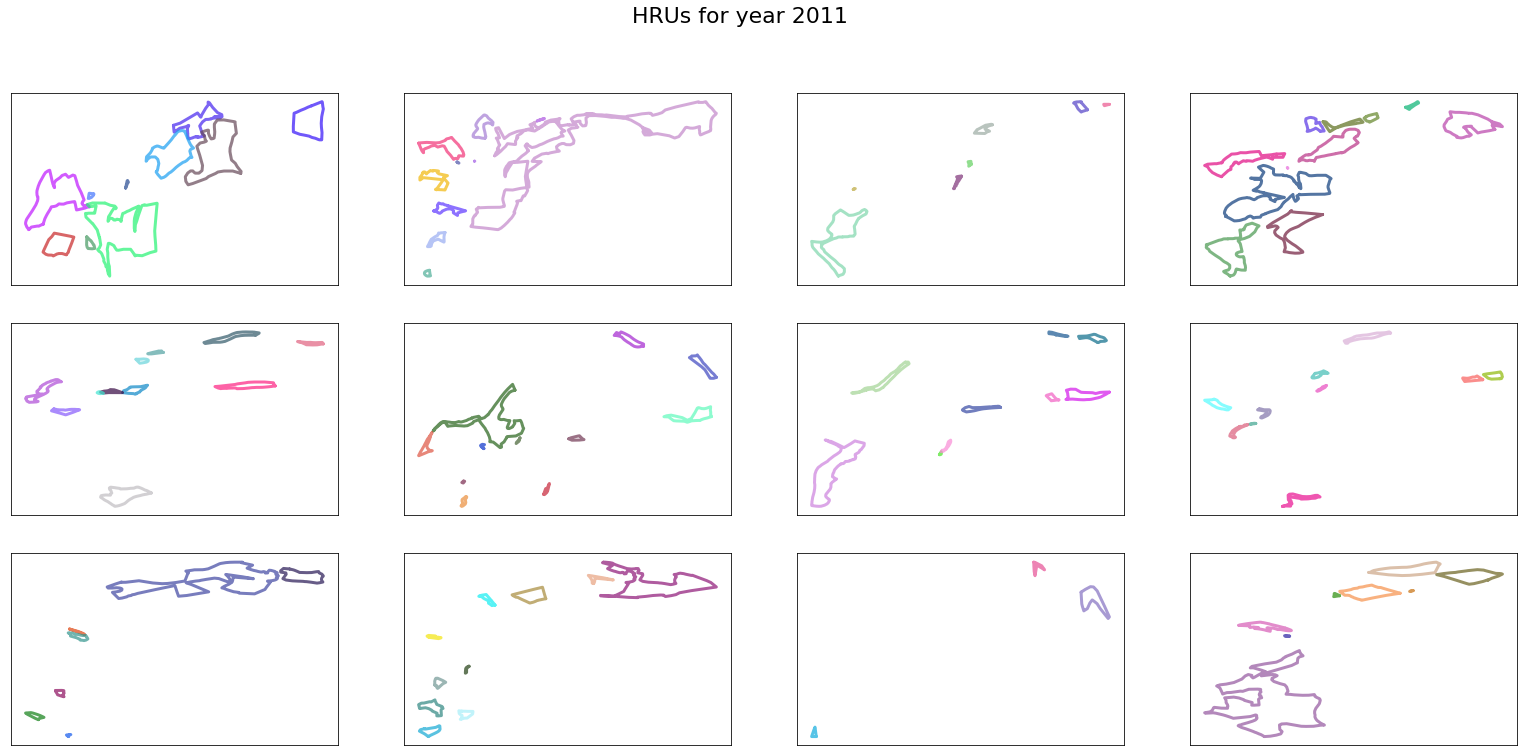

Checking validity of landuse shapefile
soil 0 is valid now
soil 1 is valid now
soil 2 is valid now


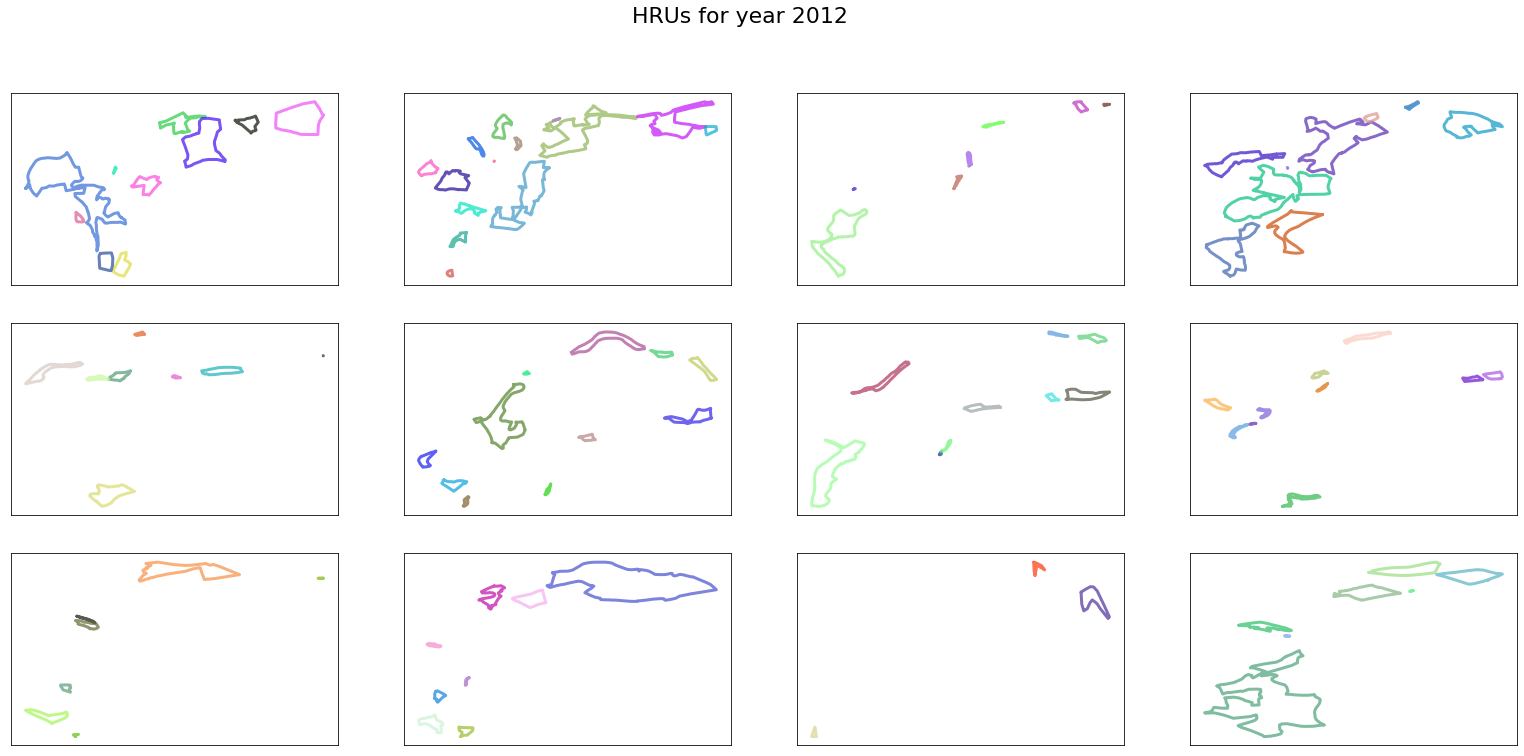

Checking validity of landuse shapefile
soil 0 is valid now
soil 1 is valid now
soil 2 is valid now


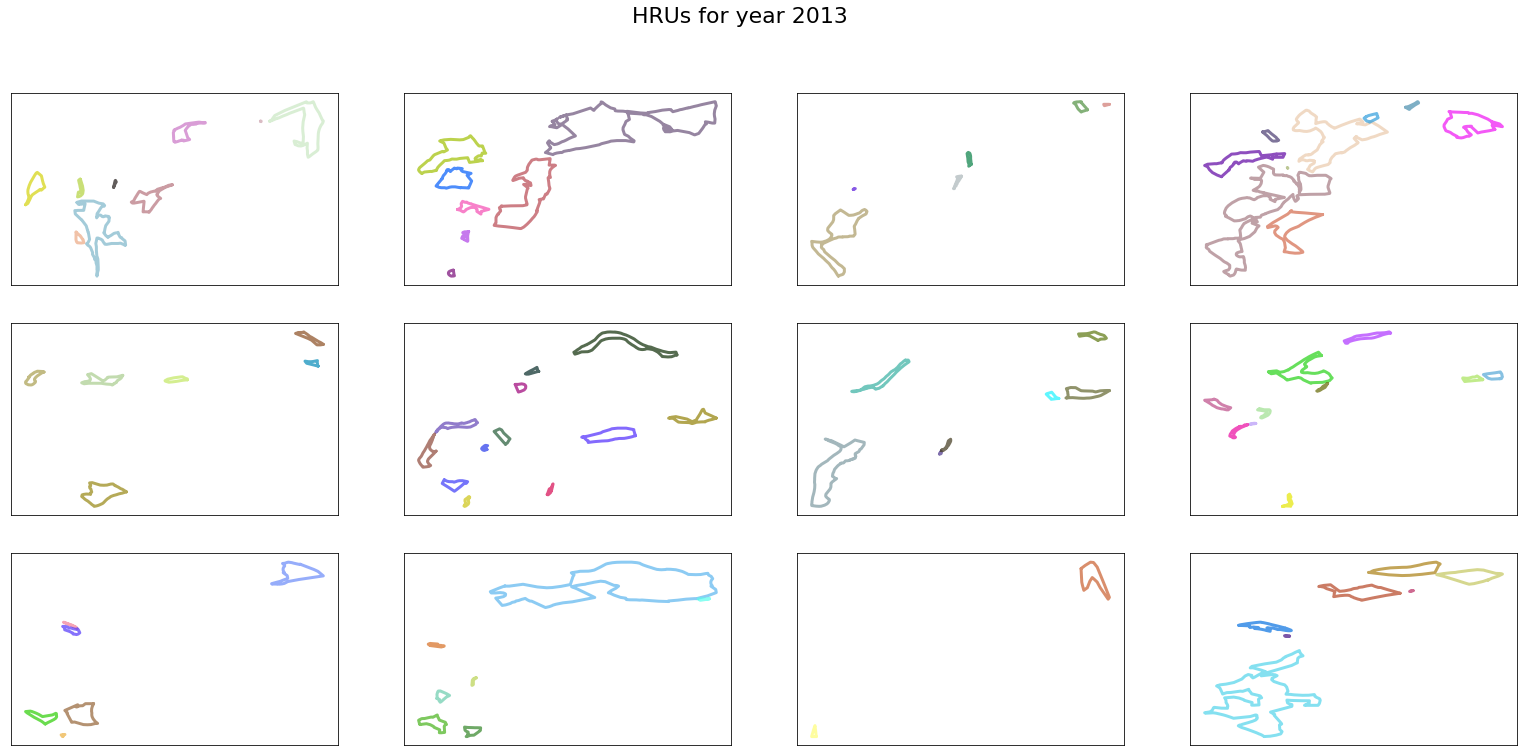

Checking validity of landuse shapefile
soil 0 is valid now
soil 1 is valid now
soil 2 is valid now


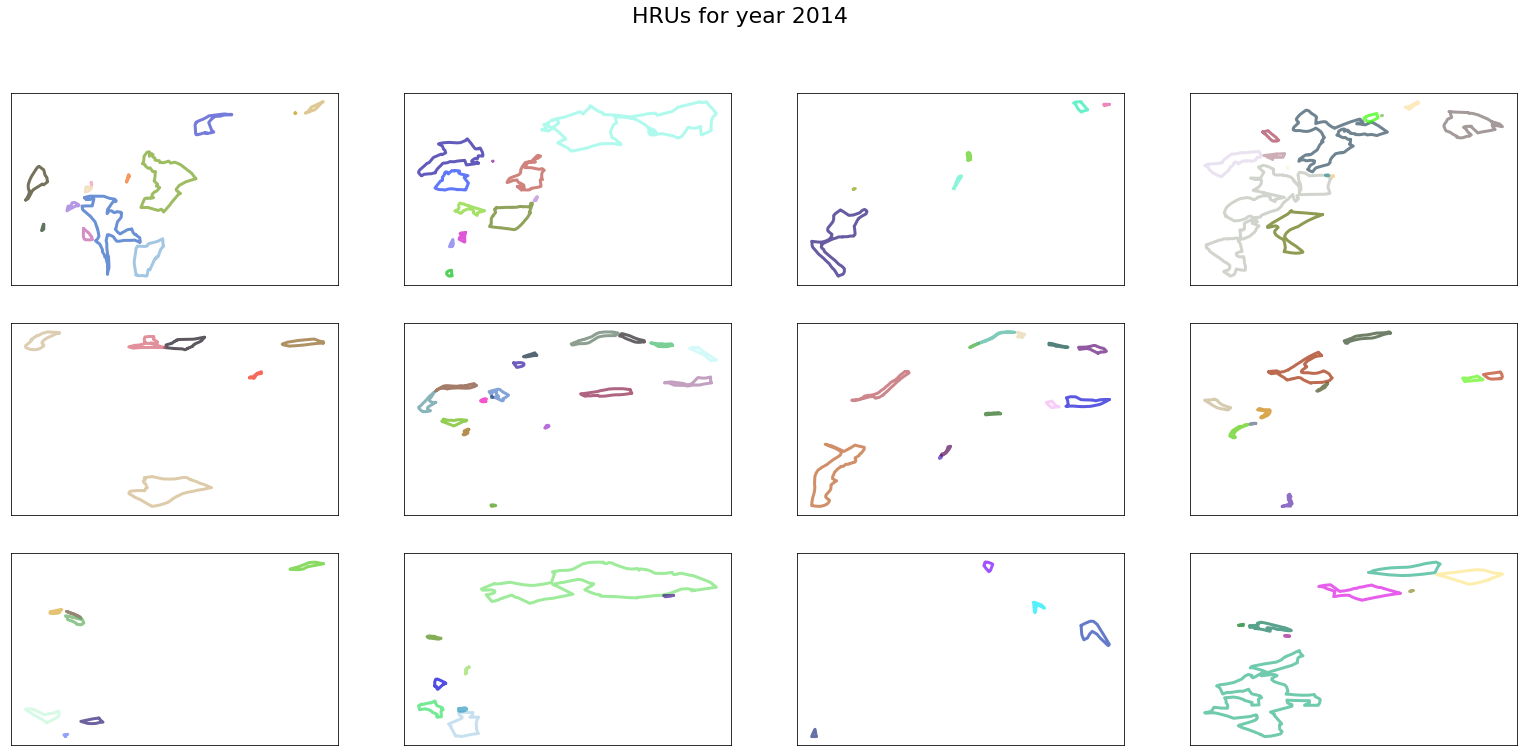

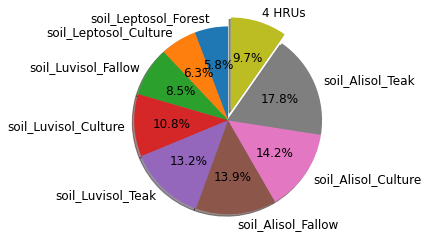

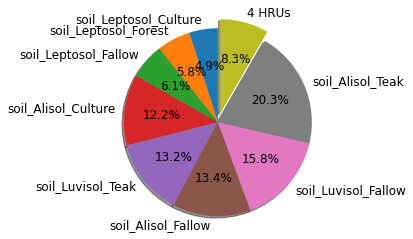

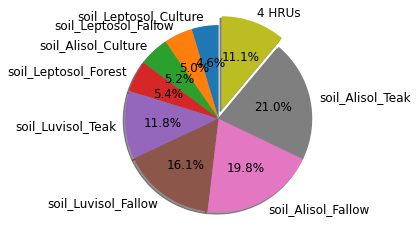

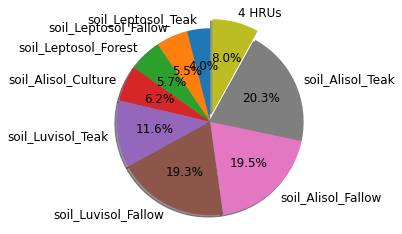

/usr/local/lib/python3.7/dist-packages/AI4Water/utils/spatial_processing.py:432: UserWarning:

AutoDateLocator was unable to pick an appropriate interval for this date range. It may be necessary to add an interval value to the AutoDateLocator's intervald dictionary. Defaulting to 6.

/usr/local/lib/python3.7/dist-packages/ipykernel/pylab/backend_inline.py:179: UserWarning:

AutoDateLocator was unable to pick an appropriate interval for this date range. It may be necessary to add an interval value to the AutoDateLocator's intervald dictionary. Defaulting to 6.

/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning:

AutoDateLocator was unable to pick an appropriate interval for this date range. It may be necessary to add an interval value to the AutoDateLocator's intervald dictionary. Defaulting to 6.



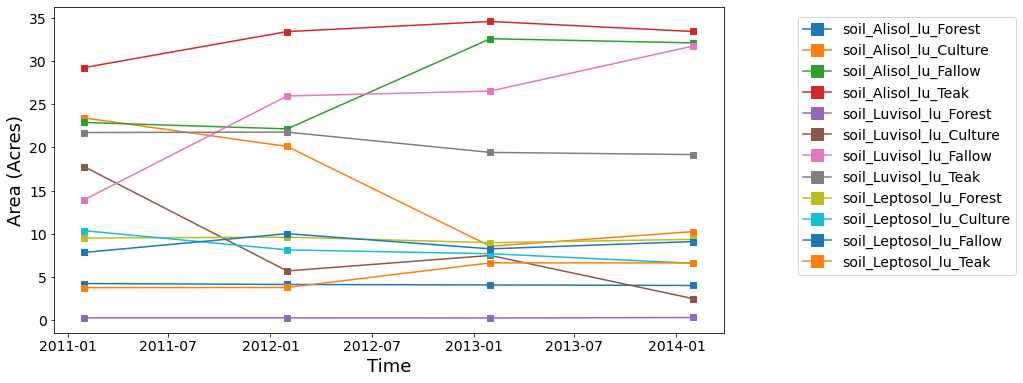

In [8]:
run_and_plot(years)

Checking validity of landuse shapefile
soil 0 is valid now
soil 1 is valid now
soil 2 is valid now


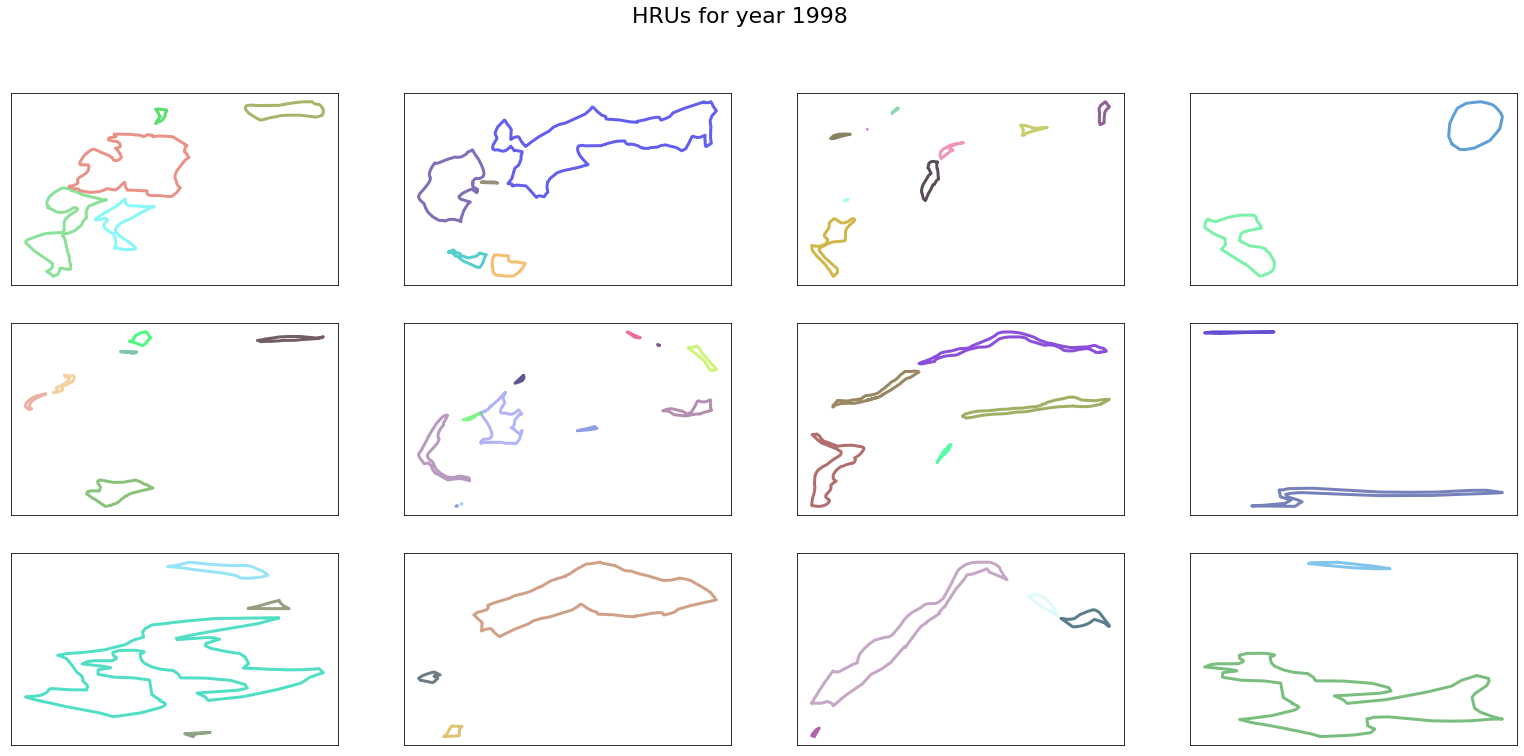

Checking validity of landuse shapefile
soil 0 is valid now
soil 1 is valid now
soil 2 is valid now


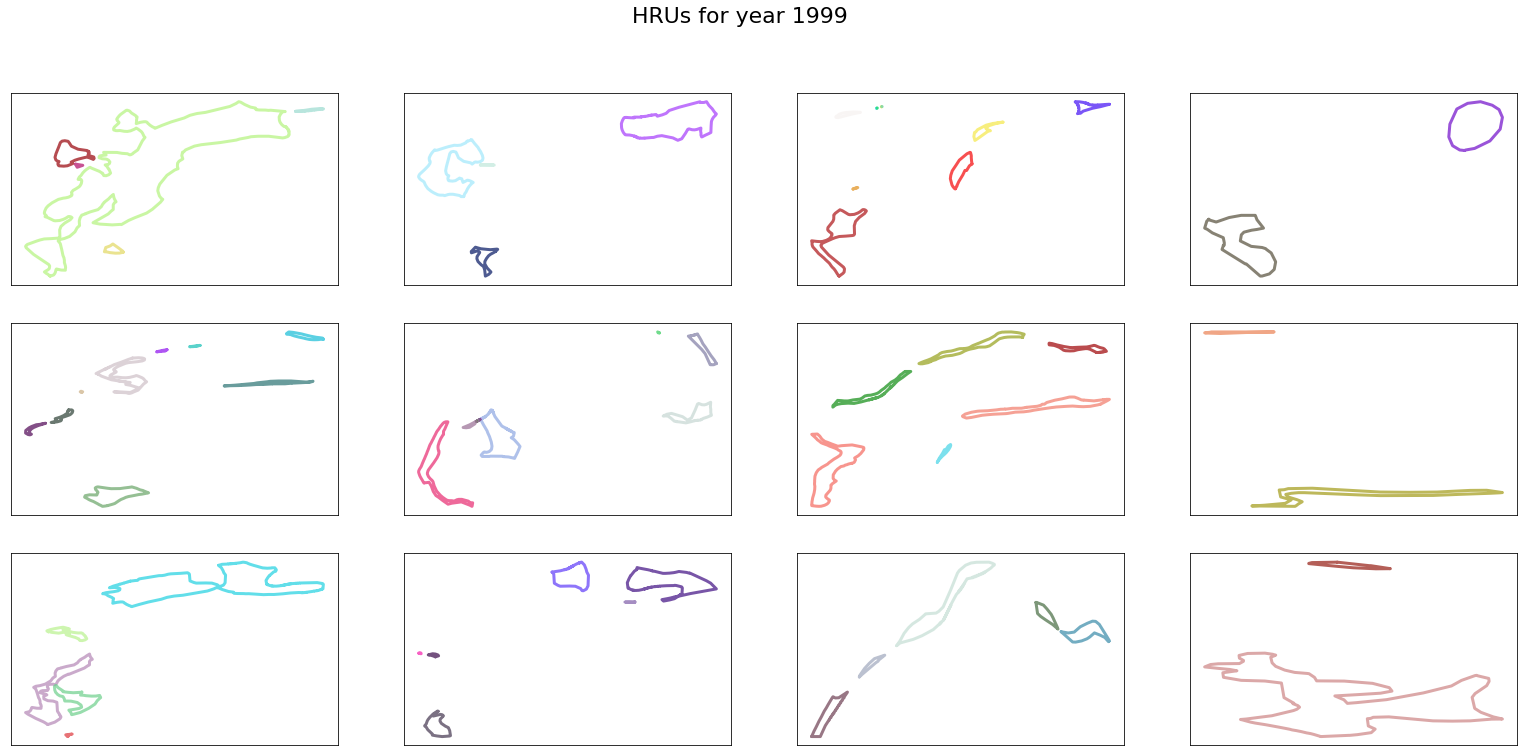

Checking validity of landuse shapefile
soil 0 is valid now
soil 1 is valid now
soil 2 is valid now


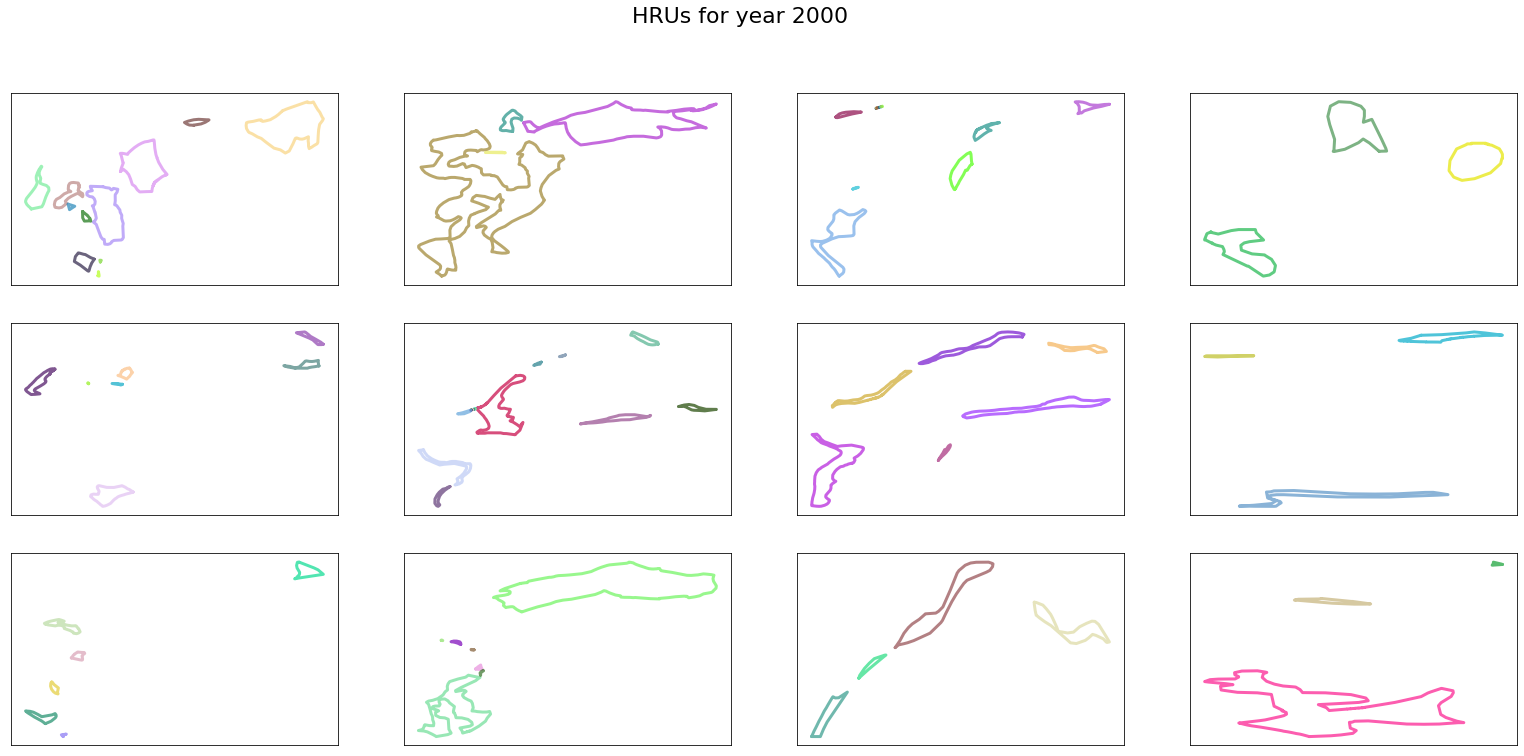

Checking validity of landuse shapefile
soil 0 is valid now
soil 1 is valid now
soil 2 is valid now


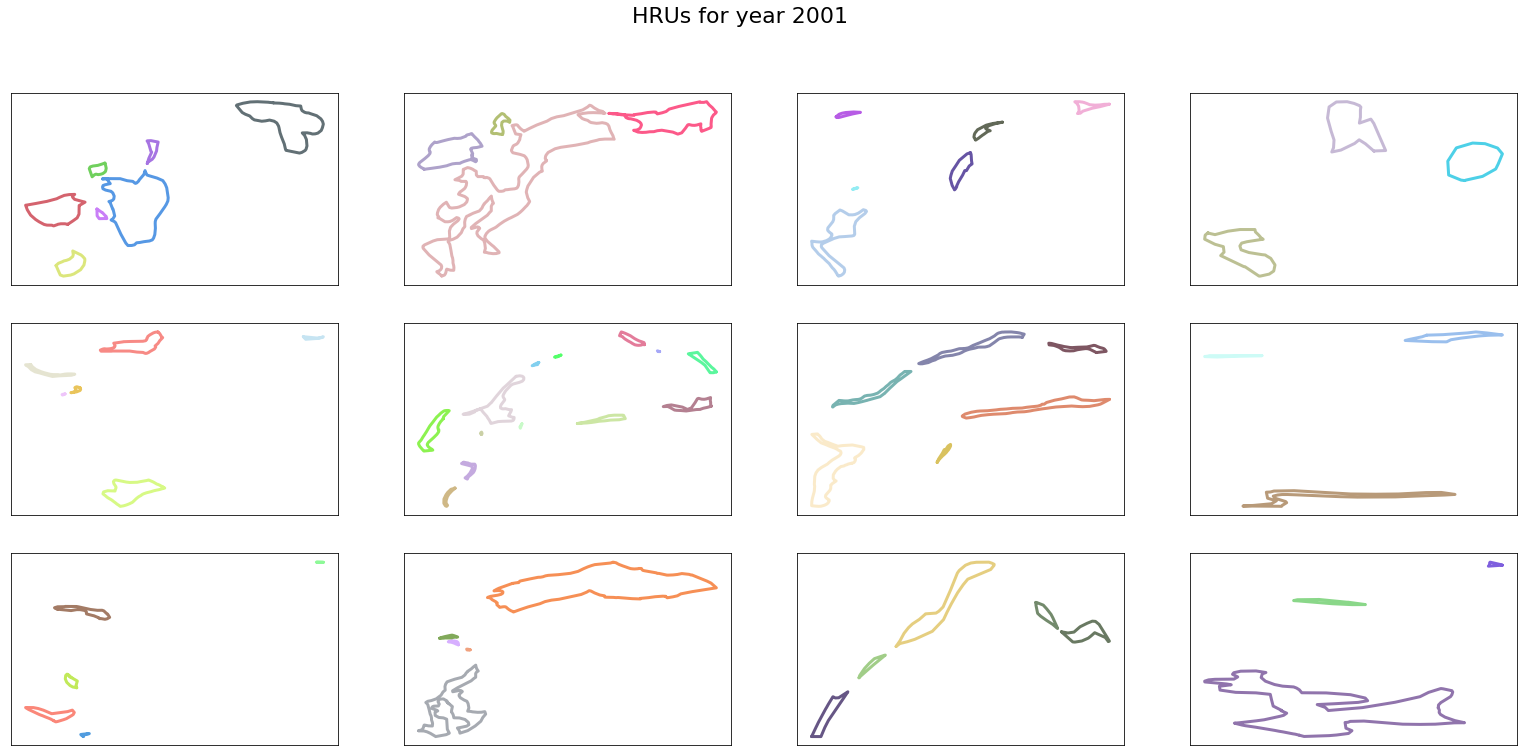

Checking validity of landuse shapefile
soil 0 is valid now
soil 1 is valid now
soil 2 is valid now


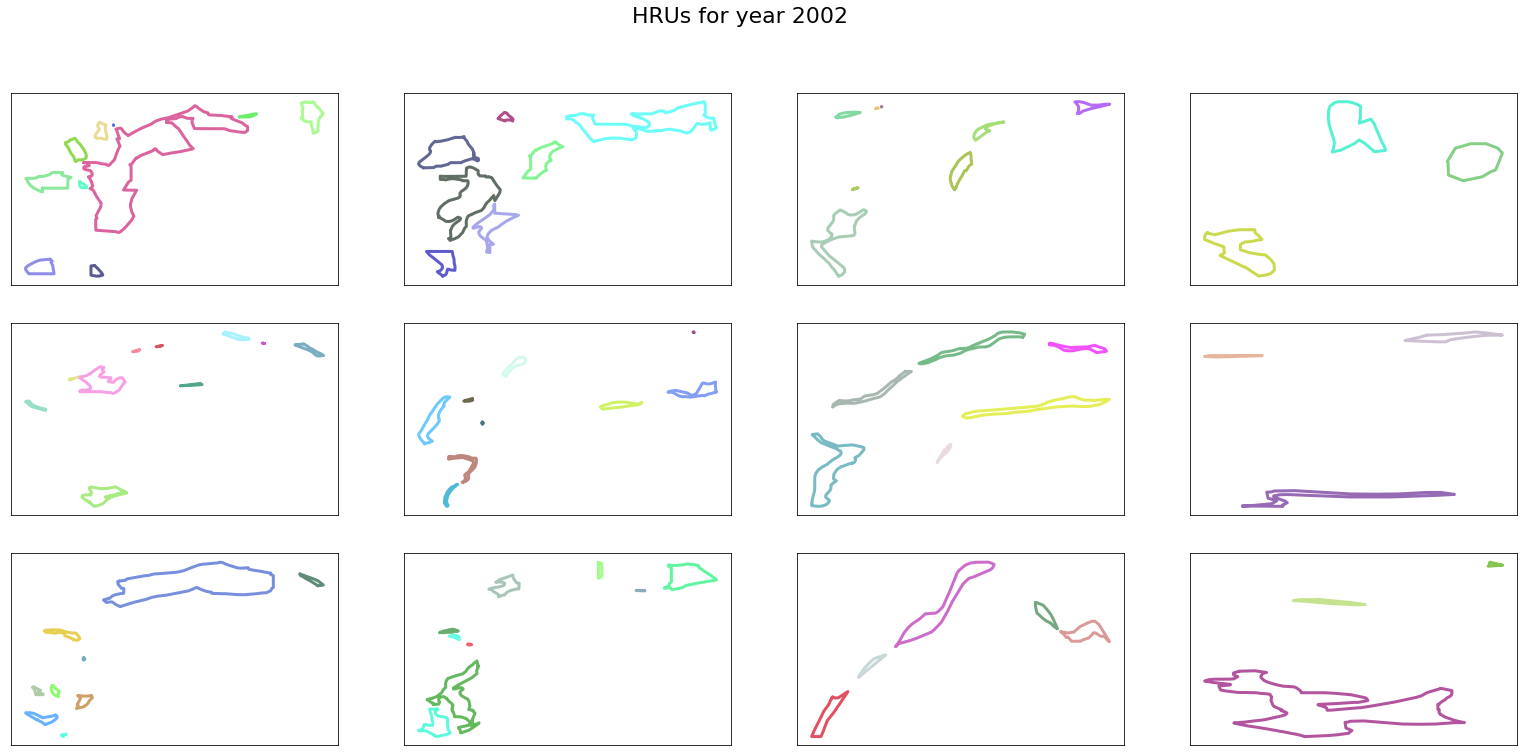

Checking validity of landuse shapefile
soil 0 is valid now
soil 1 is valid now
soil 2 is valid now


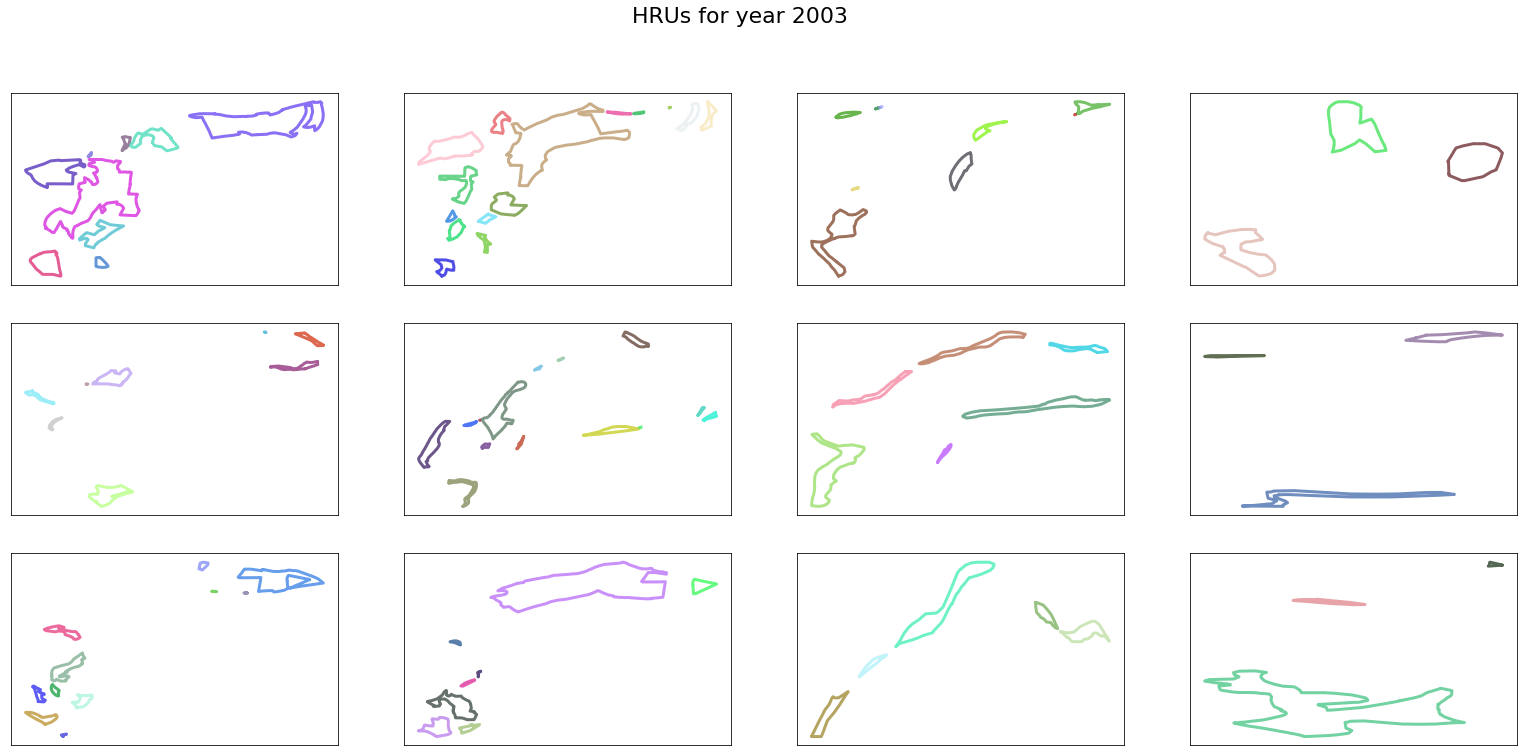

Checking validity of landuse shapefile
soil 0 is valid now
soil 1 is valid now
soil 2 is valid now


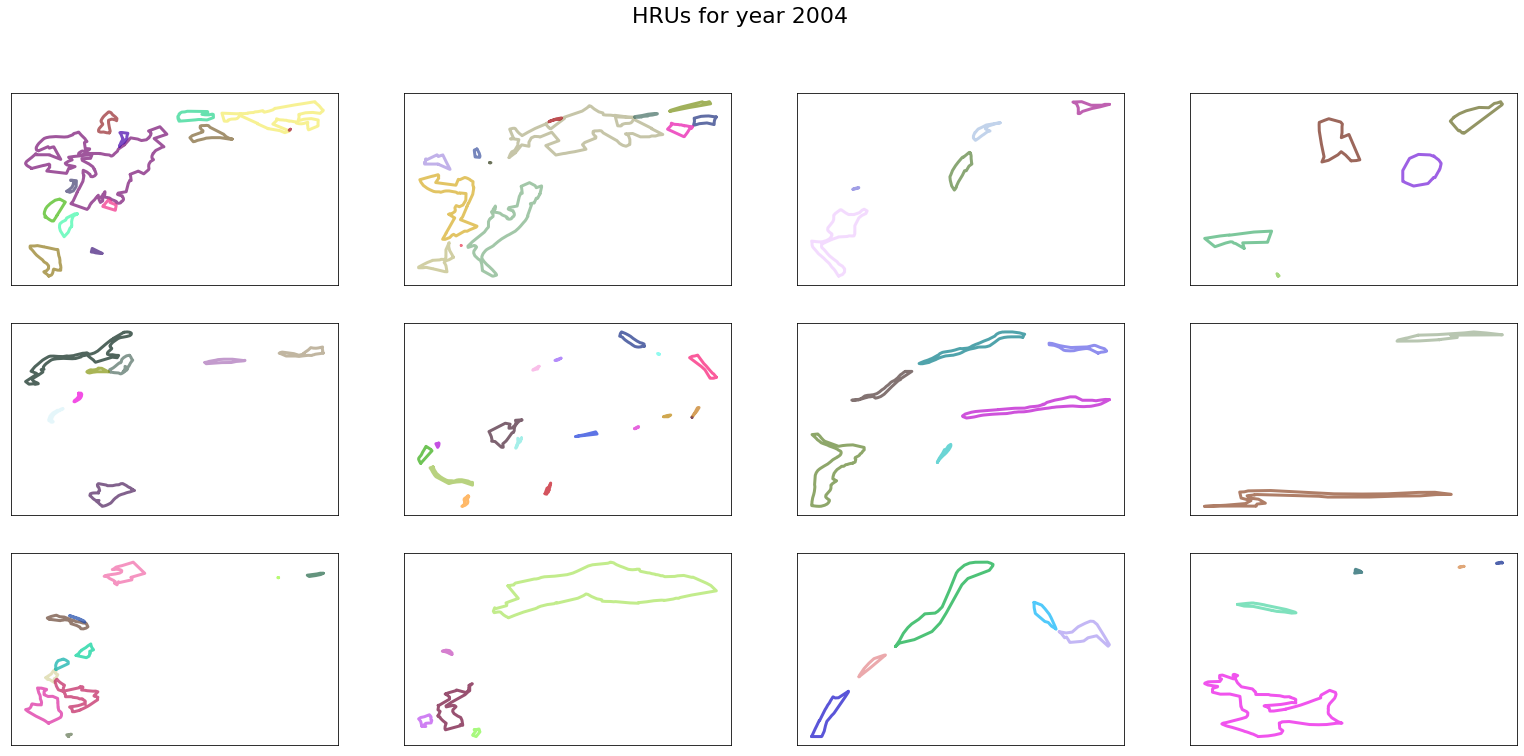

Checking validity of landuse shapefile
soil 0 is valid now
soil 1 is valid now
soil 2 is valid now


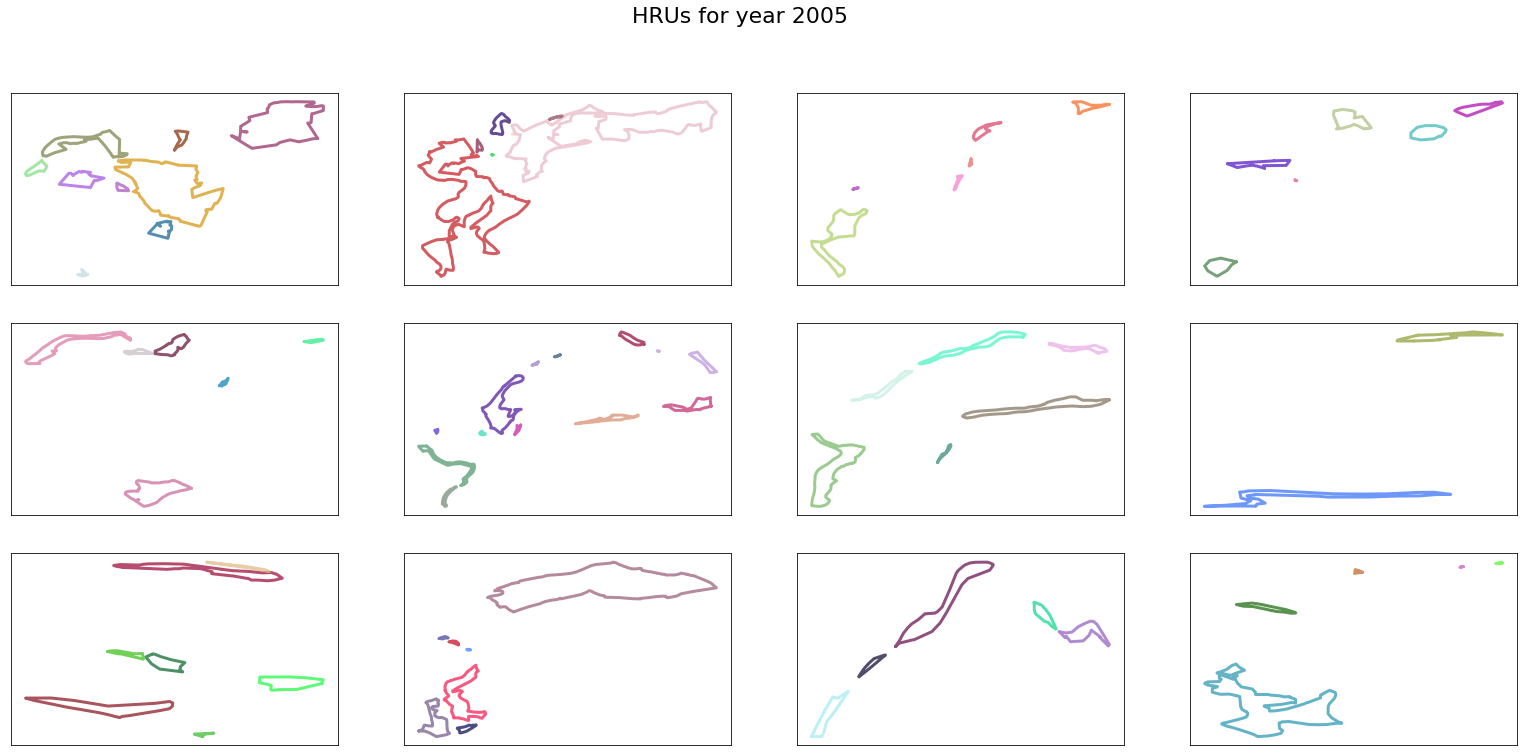

Checking validity of landuse shapefile
soil 0 is valid now
soil 1 is valid now
soil 2 is valid now


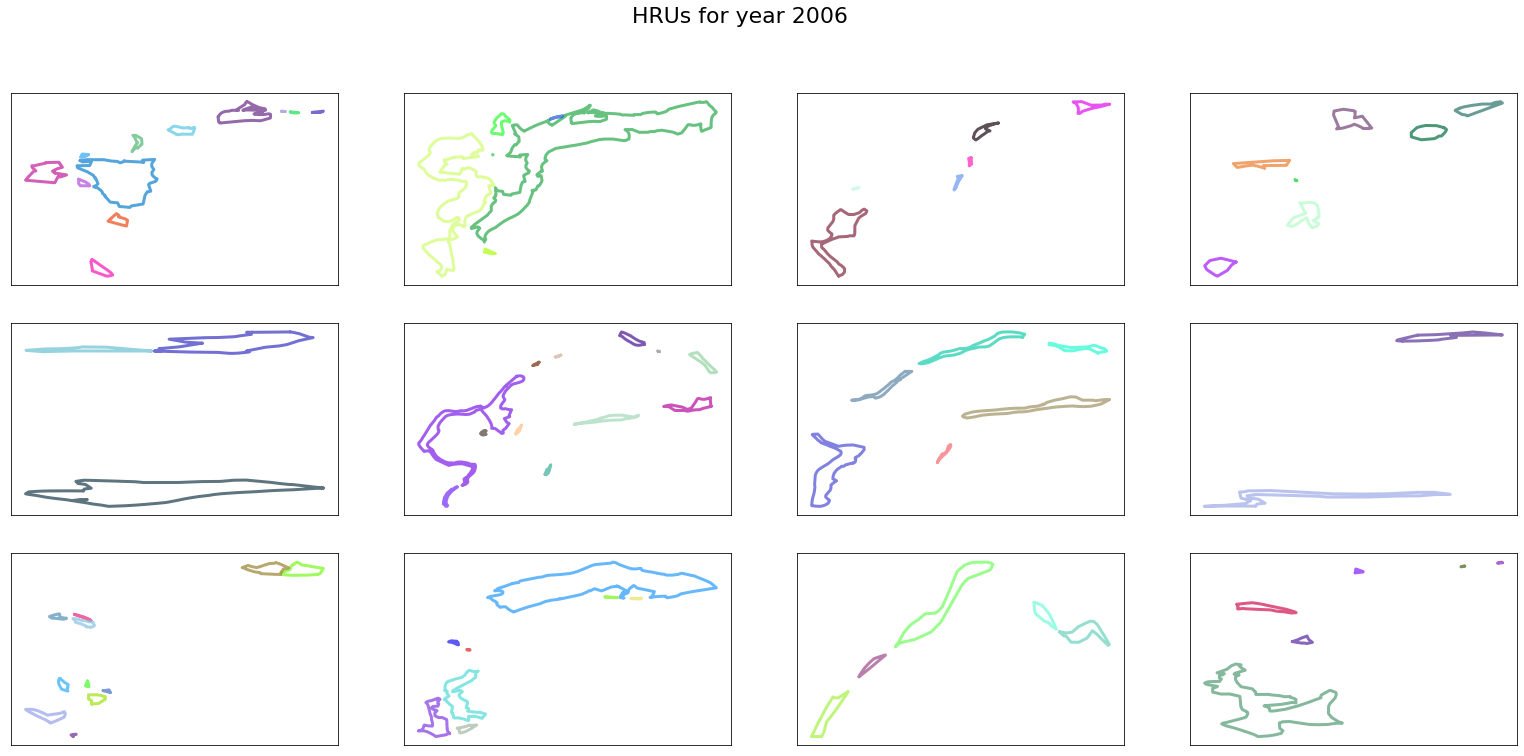

Checking validity of landuse shapefile
soil 0 is valid now
soil 1 is valid now
soil 2 is valid now


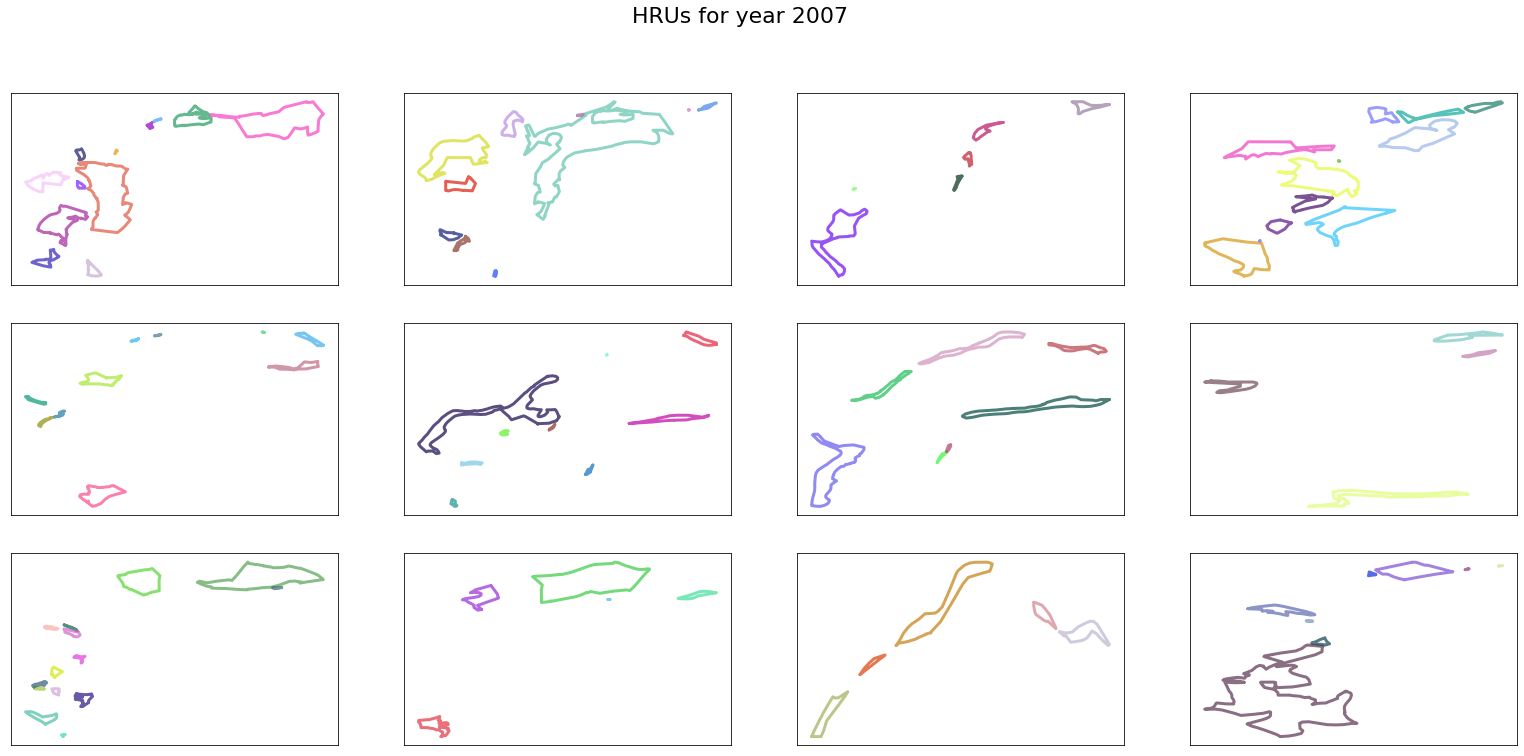

Checking validity of landuse shapefile
soil 0 is valid now
soil 1 is valid now
soil 2 is valid now


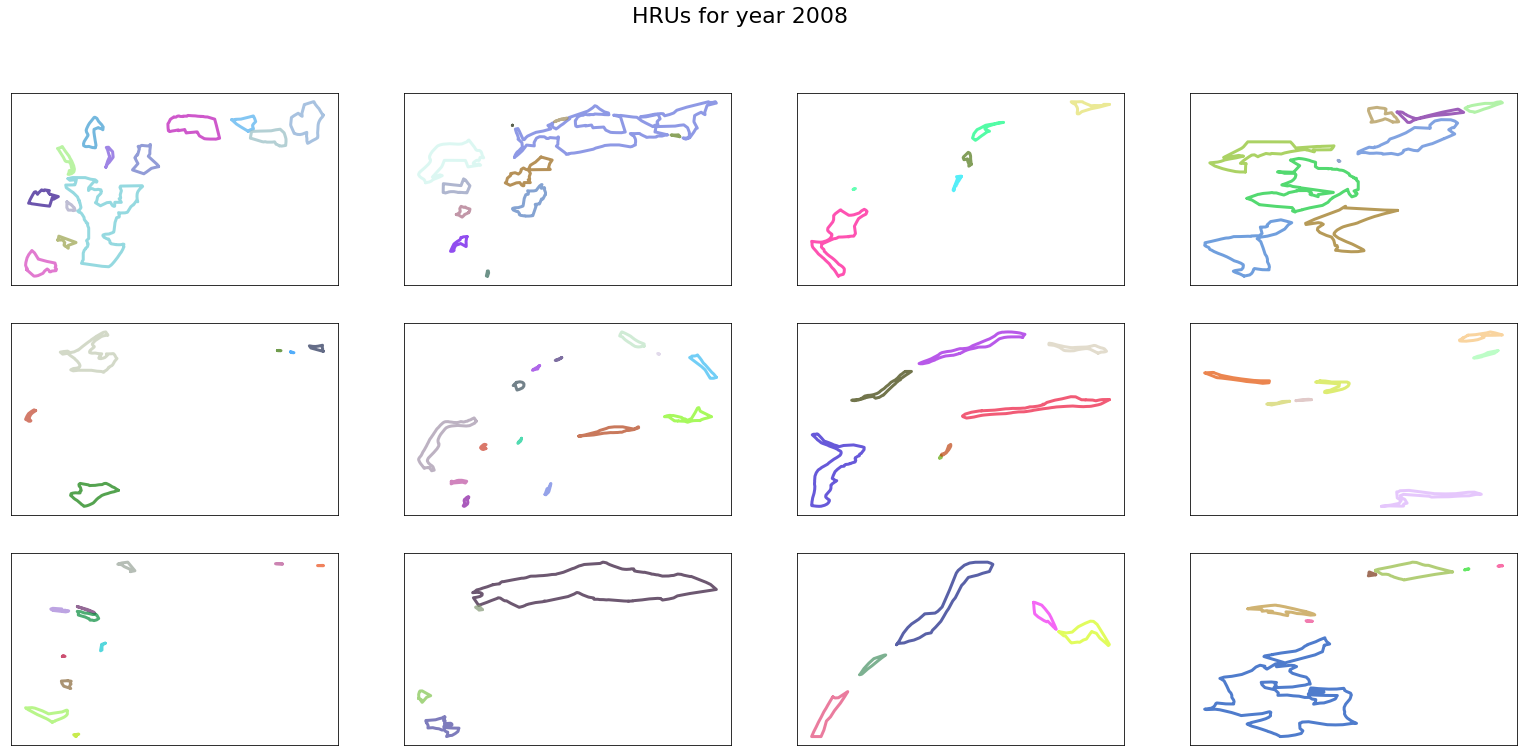

Checking validity of landuse shapefile
soil 0 is valid now
soil 1 is valid now
soil 2 is valid now


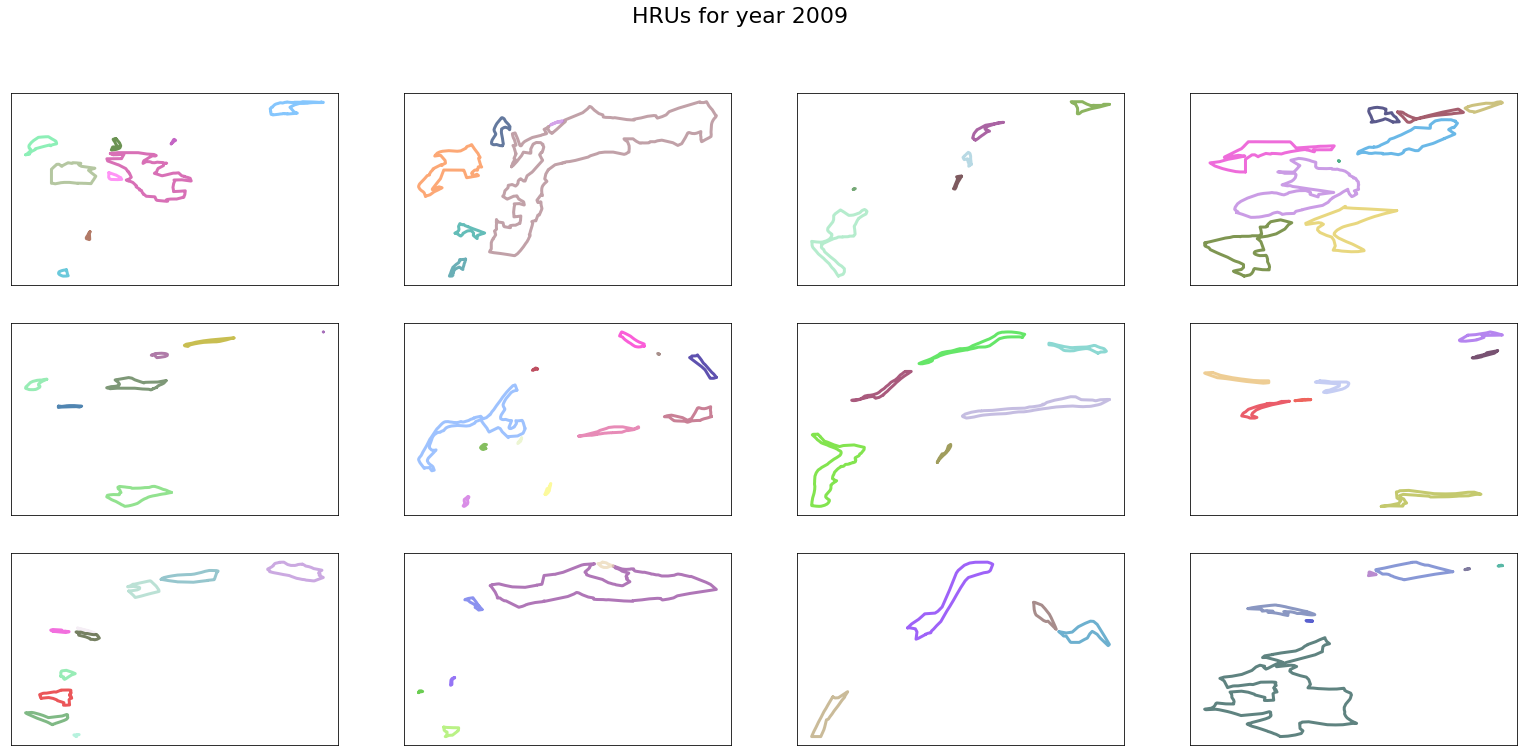

Checking validity of landuse shapefile
soil 0 is valid now
soil 1 is valid now
soil 2 is valid now


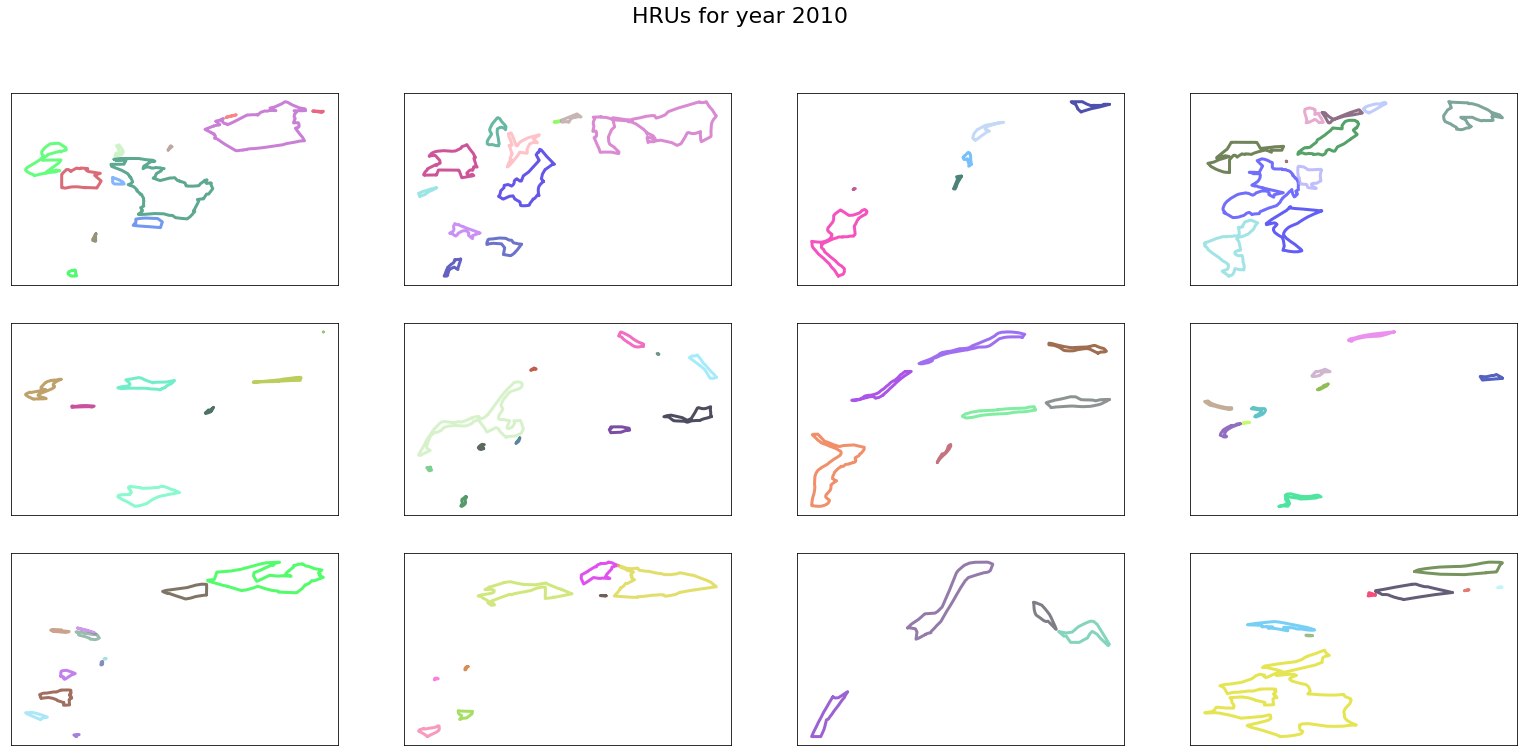

Checking validity of landuse shapefile
soil 0 is valid now
soil 1 is valid now
soil 2 is valid now


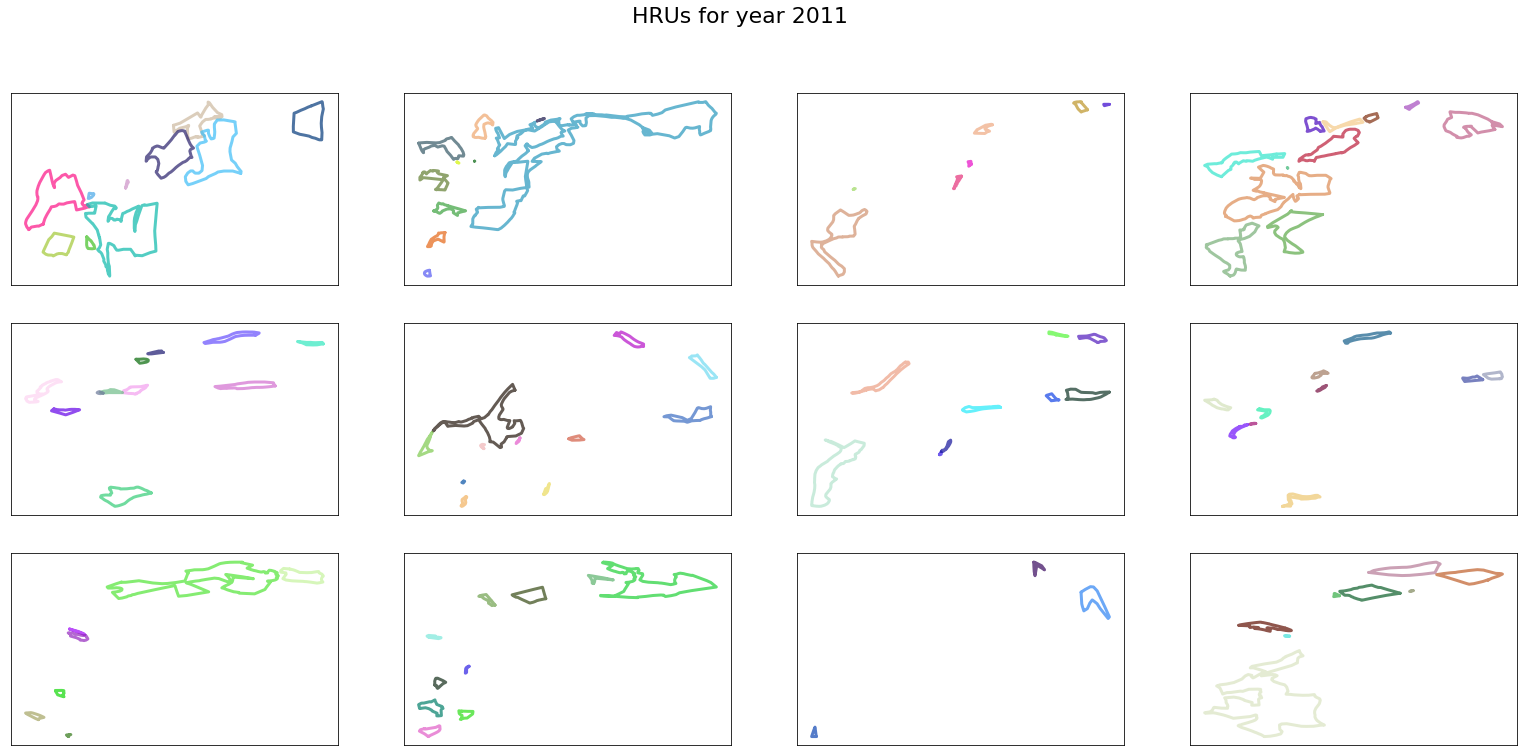

Checking validity of landuse shapefile
soil 0 is valid now
soil 1 is valid now
soil 2 is valid now


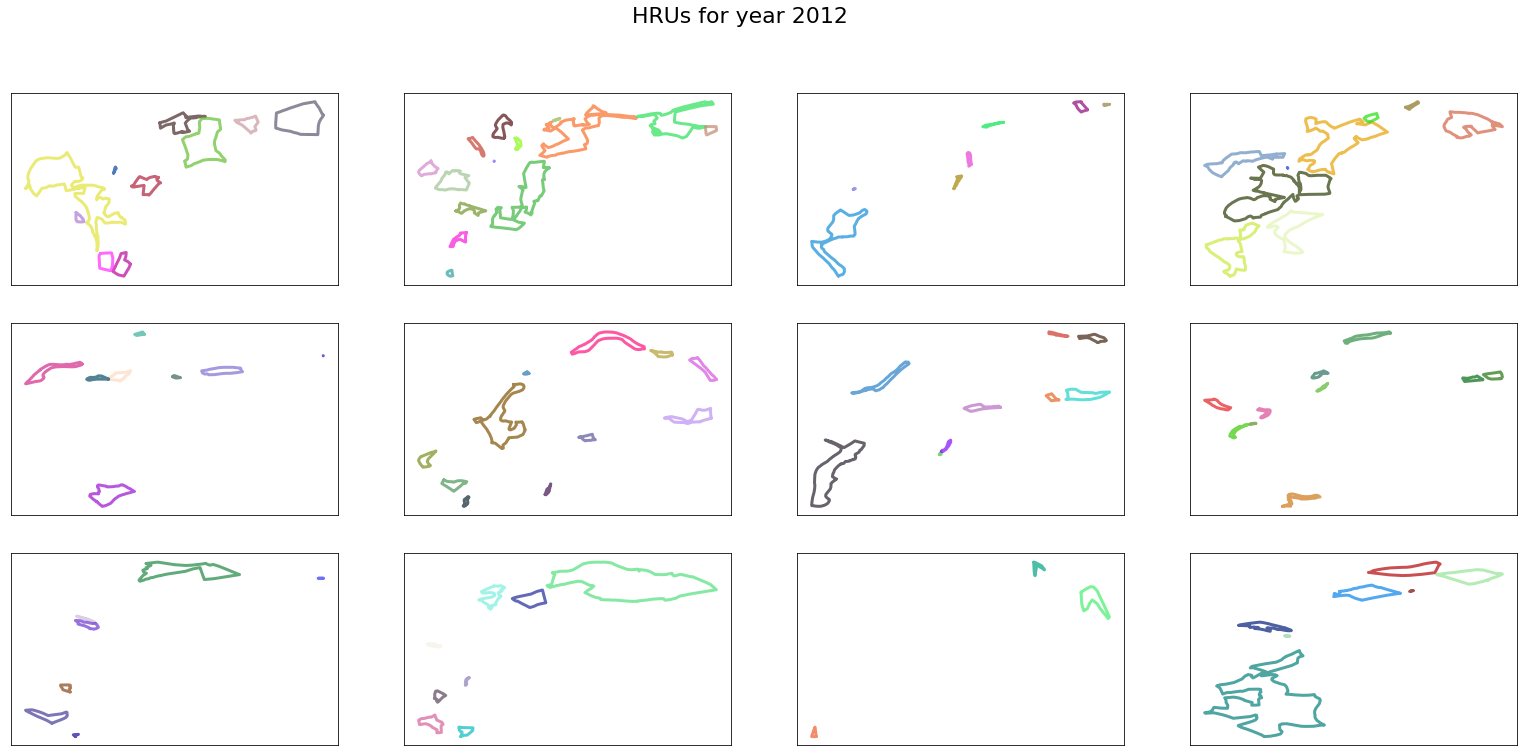

Checking validity of landuse shapefile
soil 0 is valid now
soil 1 is valid now
soil 2 is valid now


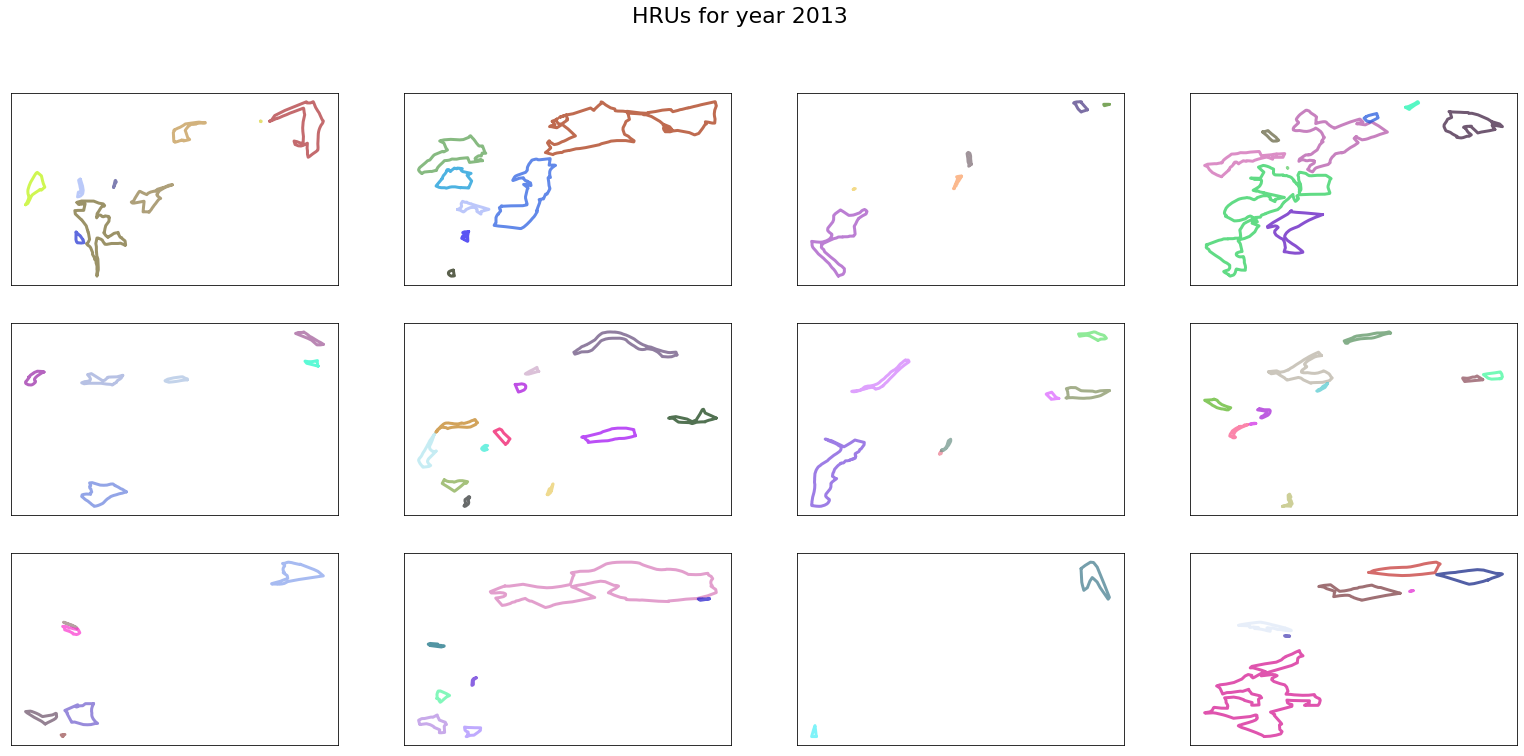

Checking validity of landuse shapefile
soil 0 is valid now
soil 1 is valid now
soil 2 is valid now


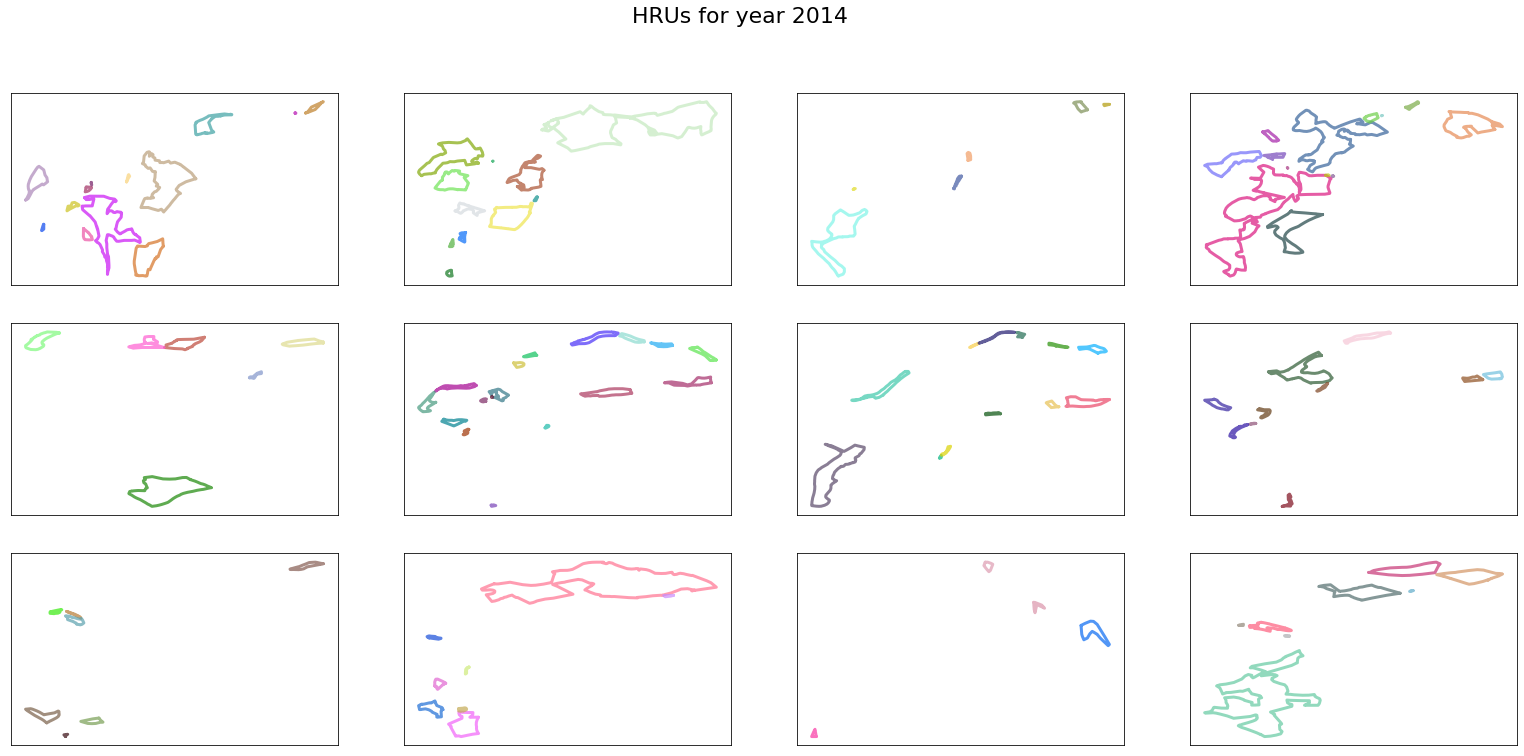

Checking validity of landuse shapefile
soil 0 is valid now
soil 1 is valid now
soil 2 is valid now


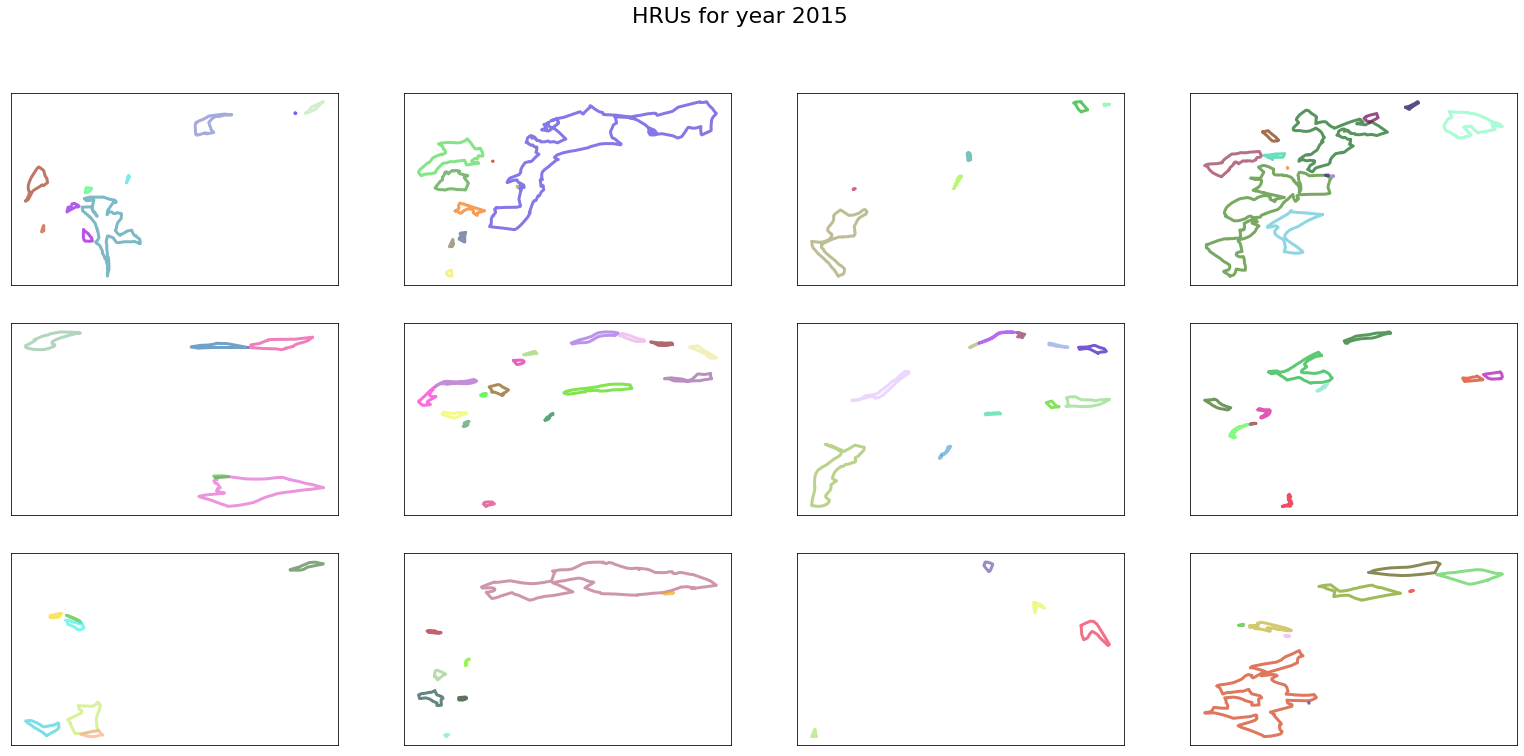

Checking validity of landuse shapefile
soil 0 is valid now
soil 1 is valid now
soil 2 is valid now


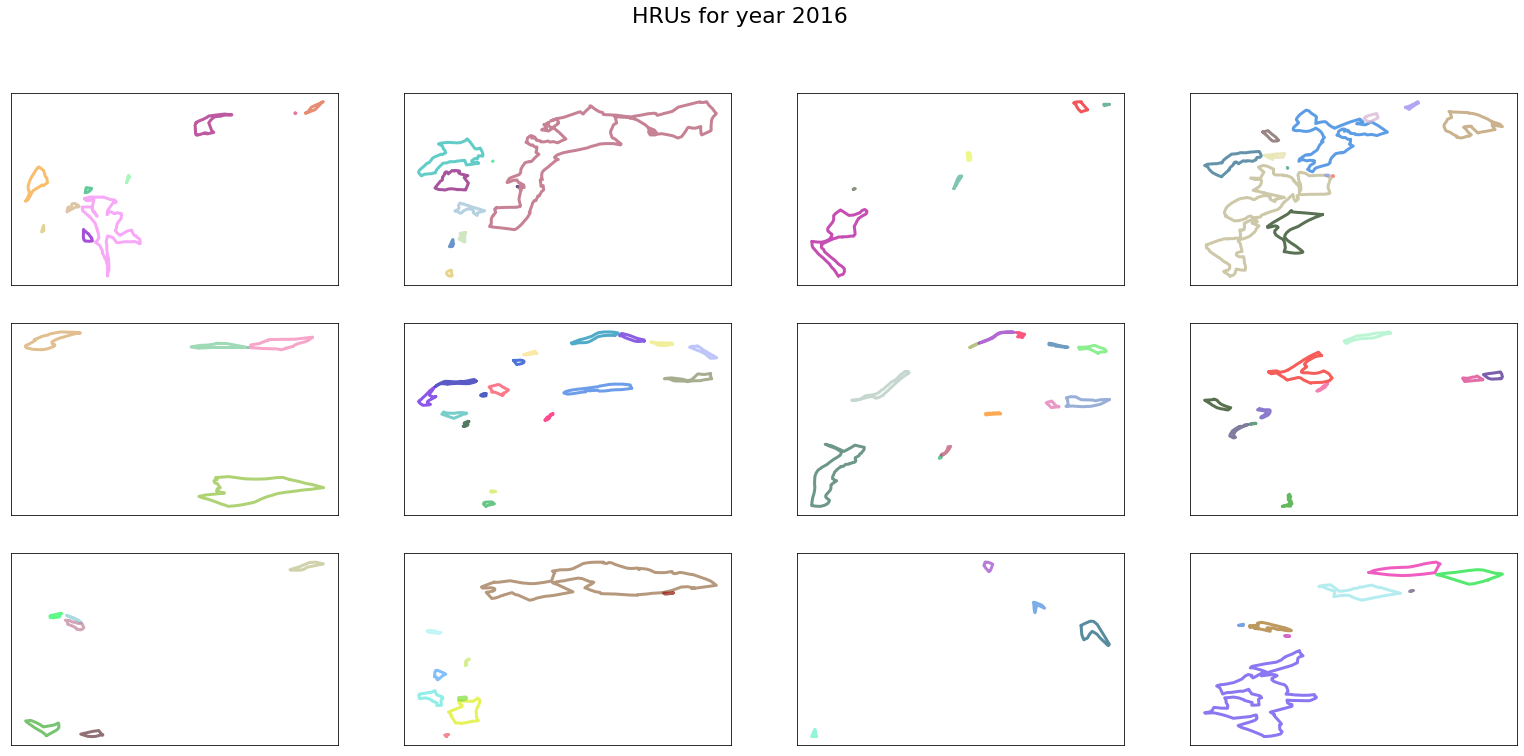

Checking validity of landuse shapefile
soil 0 is valid now
soil 1 is valid now
soil 2 is valid now


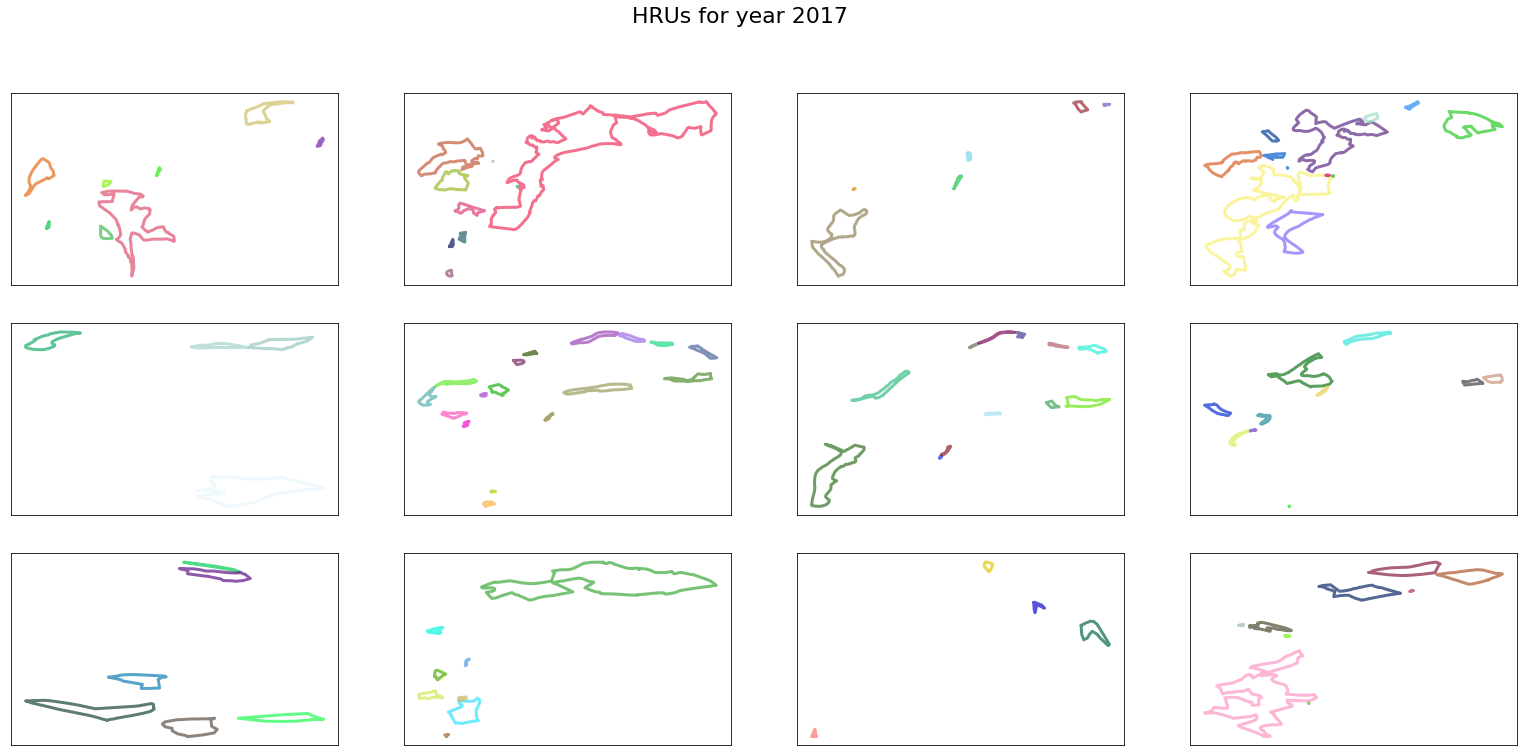

Checking validity of landuse shapefile
soil 0 is valid now
soil 1 is valid now
soil 2 is valid now


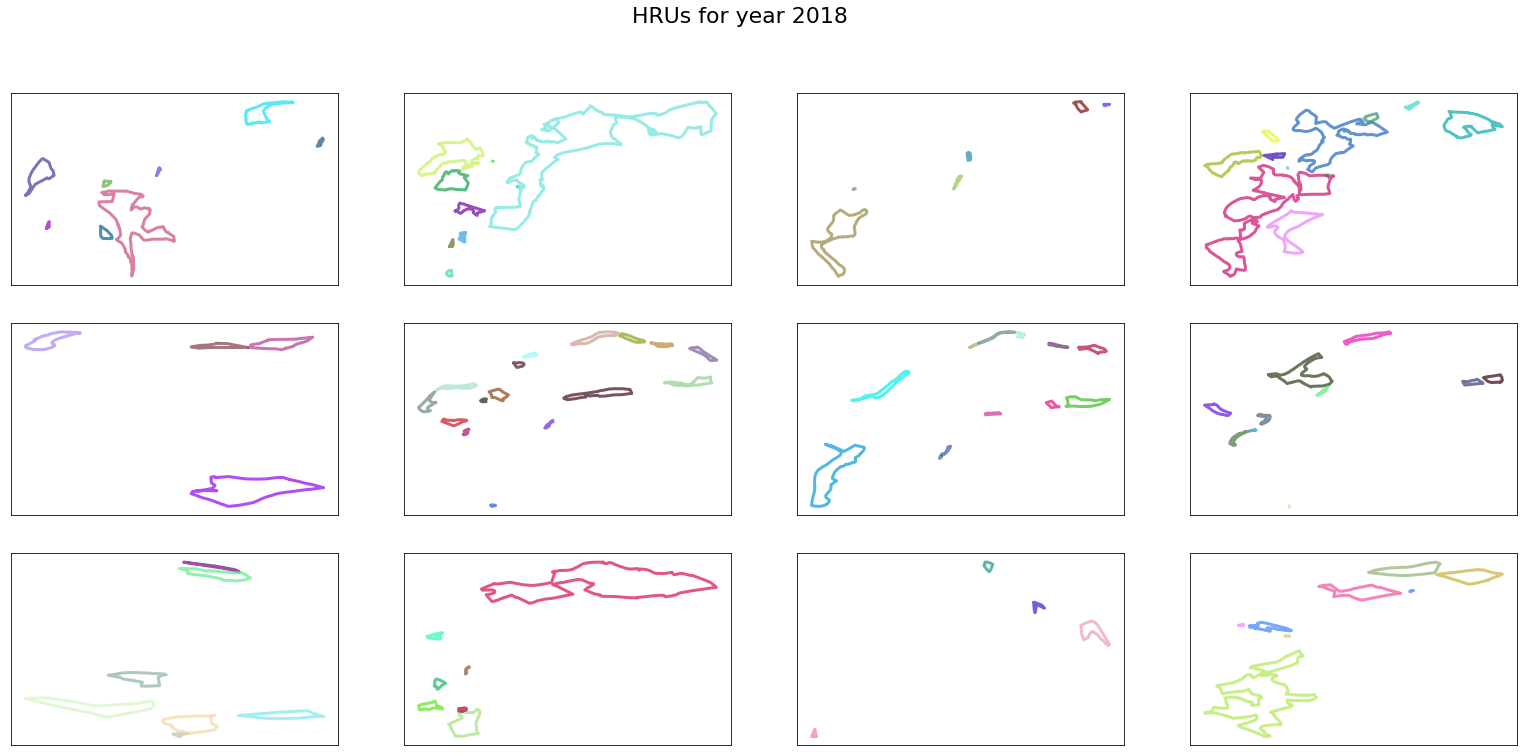

Checking validity of landuse shapefile
soil 0 is valid now
soil 1 is valid now
soil 2 is valid now


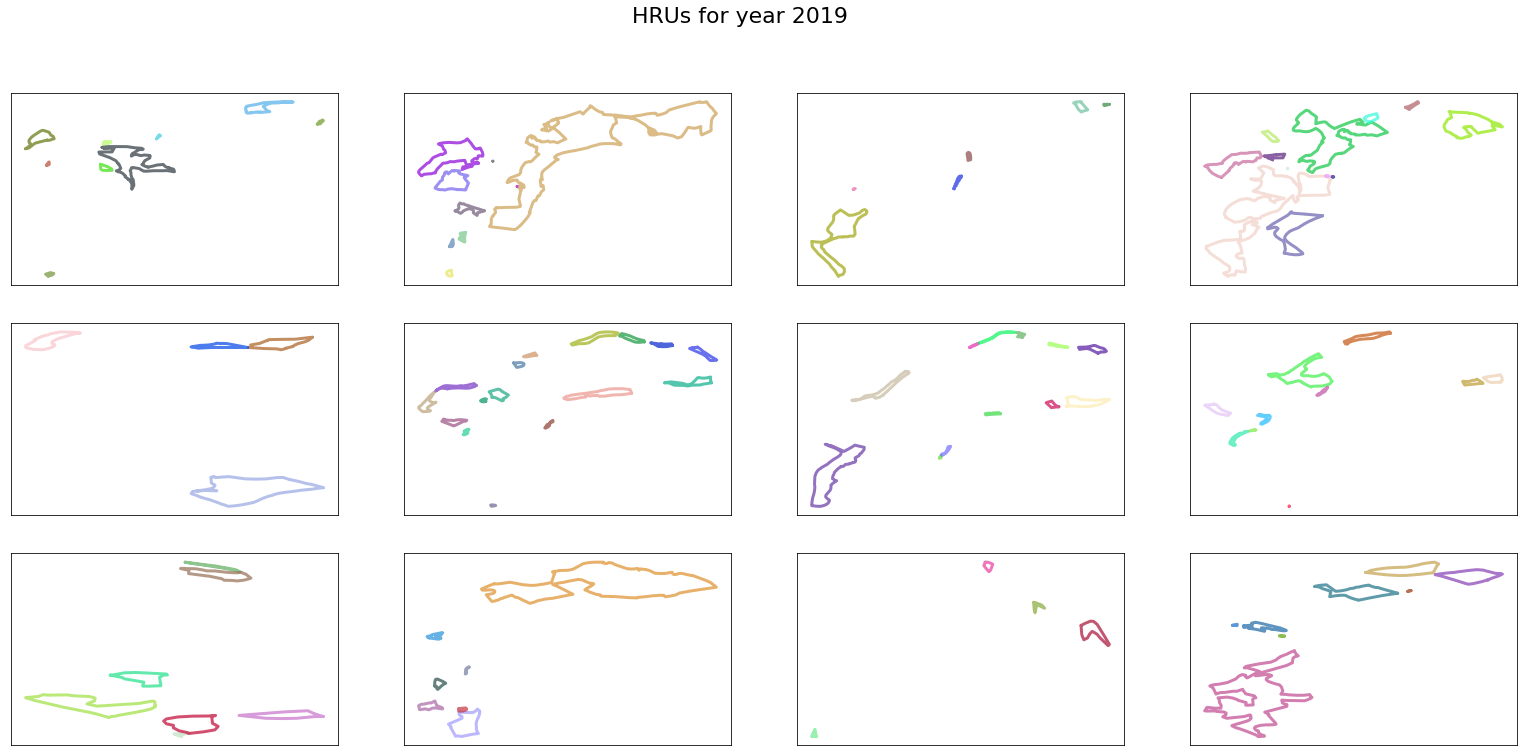

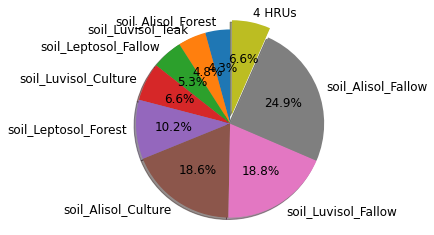

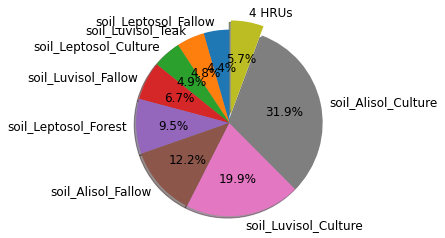

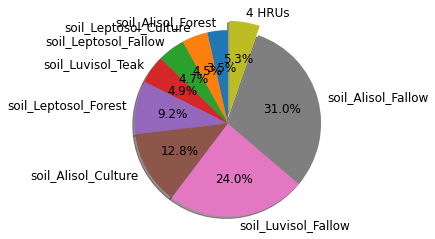

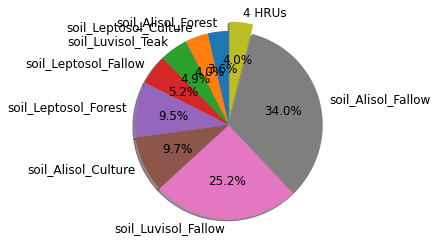

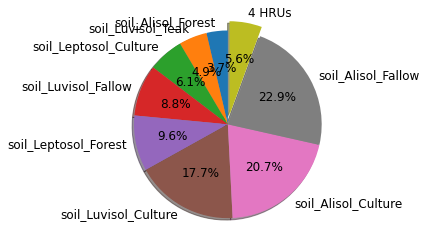

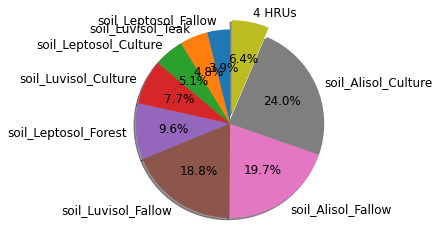

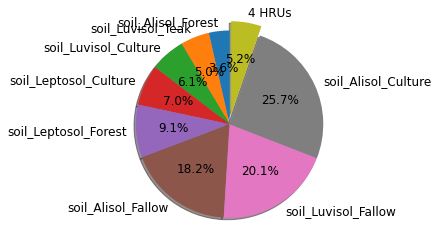

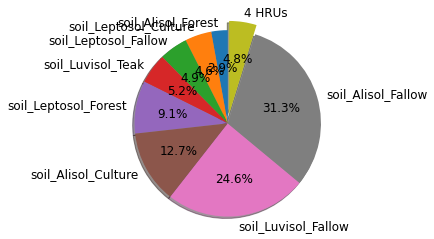

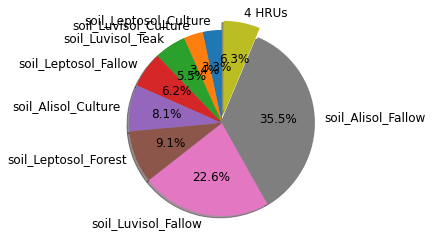

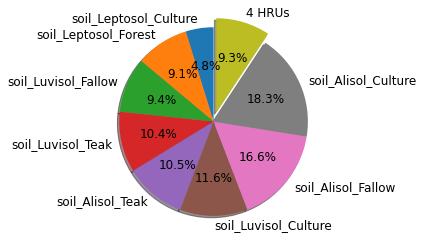

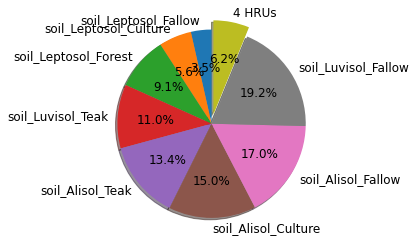

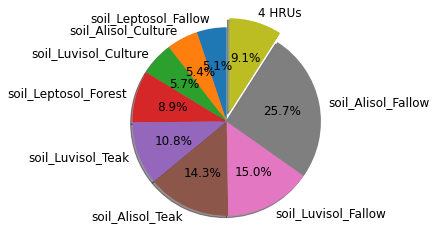

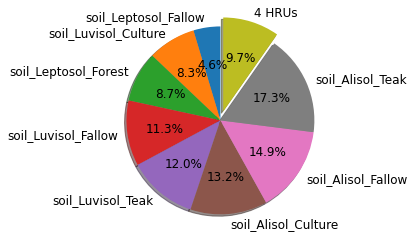

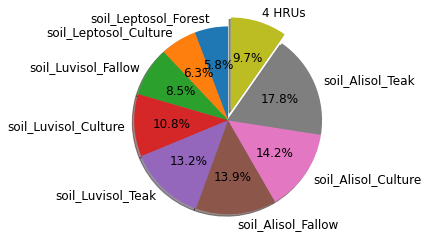

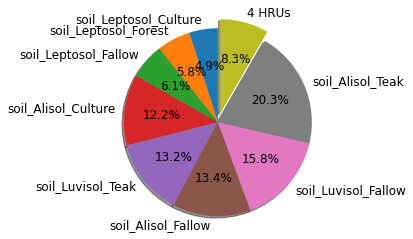

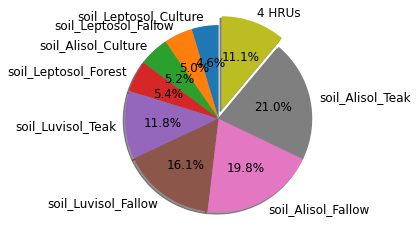

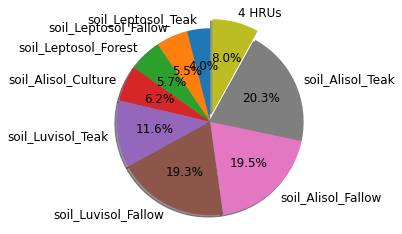

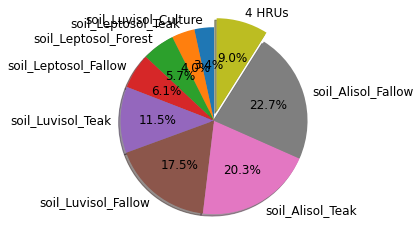

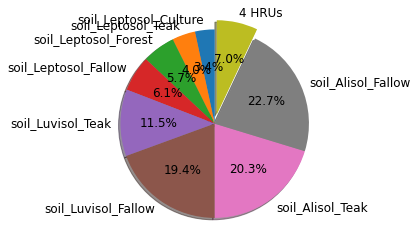

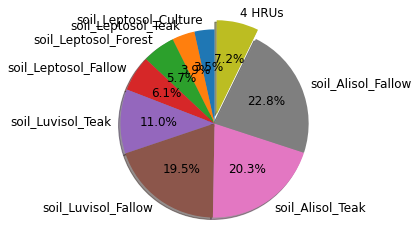

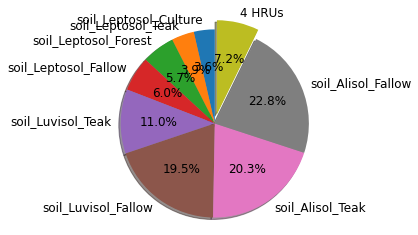

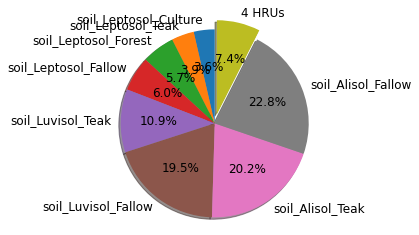

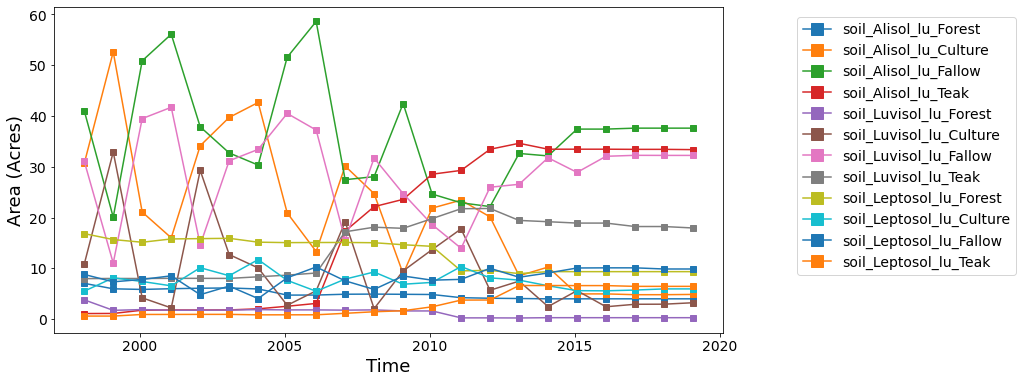

In [9]:
years = {}
for yr in range(1998, 2020):
    years[yr] = {'shapefile': os.path.join(shapefile_paths, 'lu1', f'LU{yr}.shp'), 'feature': 'NAME'}

run_and_plot(years)